In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

In [2]:
screened_refs = pd.read_csv('title_abstract_screening.csv')
screened_refs

Title  \
0                 The Handbook of Crisis Communication   
1    COVID-19 and Future Disease X in Circular Econ...   
2    Social Media as Amedium of Crisis Communicatio...   
3    986 A Systematic Review of Medical Student Wil...   
4    The Preparedness Level of Community in Facing ...   
..                                                 ...   
205  Meteorological Indigenous Knowledge Systems fo...   
206  Crisis Communication in China: Strategies take...   
207  Tweets Analysis for Disaster Management: Prepa...   
208  Crisis Communication in the Age of Social Medi...   
209  Communication in crisis management \xe2\x80\x9...   

                                               Authors  \
0                W. Timothy Coombs; Sherry J. Holladay   
1    Cristina Possas; Ernesto T. A. Marques; João B...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
205                                                NaN   
206                                                NaN   
207                                                NaN   
208                                                NaN   
209                                                NaN   

                                              Abstract  Published Year  \
0                                                  NaN             NaN   
1    The COVID-19 pandemic exposed a world surprisi...             NaN   
2    Social media gives the ability to communicate ...             NaN   
3    Abstract Introduction We aimed to identify mot...             NaN   
4    Preparedness in facing disaster becomes a must...             NaN   
..                                                 ...             ...   
205  The paper focuses on indigenous knowledge syst...             NaN   
206  Crisis communication strategies play an import...             NaN   
207  Social media is very important source for iden...             NaN   
208  The use of social media platforms has become a...             NaN   
209                                                NaN             NaN   

    Published Month  Journal  Volume  Issue  Pages  Accession Number  DOI  \
0        19-01-2010      NaN     NaN    NaN    NaN               NaN  NaN   
1        28-06-2021      NaN     NaN    NaN    NaN               NaN  NaN   
2        01-05-2021      NaN     NaN    NaN    NaN               NaN  NaN   
3        01-05-2021      NaN     NaN    NaN    NaN               NaN  NaN   
4        01-04-2018      NaN     NaN    NaN    NaN               NaN  NaN   
..              ...      ...     ...    ...    ...               ...  ...   
205      01-01-2020      NaN     NaN    NaN    NaN               NaN  NaN   
206      02-12-2020      NaN     NaN    NaN    NaN               NaN  NaN   
207      01-01-2020      NaN     NaN    NaN    NaN               NaN  NaN   
208      01-01-2021      NaN     NaN    NaN    NaN               NaN  NaN   
209      01-01-2021      NaN     NaN    NaN    NaN               NaN  NaN   

     Ref Covidence #  Study  \
0    NaN        #681    NaN   
1    NaN        #689    NaN   
2    NaN        #690    NaN   
3    NaN        #728    NaN   
4    NaN        #734    NaN   
..   ...         ...    ...   
205  NaN       #1242    NaN   
206  NaN       #1243    NaN   
207  NaN       #1244    NaN   
208  NaN       #1245    NaN   
209  NaN       #1246    NaN   

                                                 Notes  Tags  
0    Åshild Kolås (2024-05-08 22:37:52)(Screen): Th...   NaN  
1                                                  NaN   NaN  
2                                                  NaN   NaN  
3                                                  NaN   NaN  
4                                                  NaN   NaN  
..                                                 ...   ...  
205                        

In [3]:
df_refs = pd.read_csv('../paper_docs.csv')
df_refs

doi  \
0    https://doi.org/10.1111/j.1468-5973.2011.00639.x   
1               https://doi.org/10.1002/9781444314885   
2               https://doi.org/10.4135/9781071868096   
3                       https://doi.org/10.5772/55736   
4                https://doi.org/10.1353/ff.2013.0020   
..                                                ...   
531   https://doi.org/10.4018/978-1-7998-3473-1.ch151   
532           https://doi.org/10.7176/nmmc.vol9636-46   
533        https://doi.org/10.3311/floodrisk2020.19.1   
534              https://doi.org/10.2139/ssrn.3771377   
535             https://doi.org/10.1353/sor.2008.0016   

                                  ids  \
0    https://openalex.org/W1638501542   
1     https://openalex.org/W268257668   
2    https://openalex.org/W4312964573   
3    https://openalex.org/W1569469965   
4    https://openalex.org/W2076198500   
..                                ...   
531  https://openalex.org/W3122809911   
532  https://openalex.org/W3167411292   
533  https://openalex.org/W3181680212   
534  https://openalex.org/W3193154260   
535  https://openalex.org/W2102140168   

                                                 title publication_data  \
0    A Work‐In‐Process Literature Review: Incorpora...       04-04-2011   
1                 The Handbook of Crisis Communication       19-01-2010   
2             Choosing Crisis Communication Strategies       01-01-2021   
3    Disaster Risk Management and Social Impact Ass...       08-05-2013   
4    How to Survive Contagion, Disease, and Disaste...       01-01-2013   
..                                                 ...              ...   
531  Crisis Communication in the Age of Social Medi...       01-01-2021   
532  Social Media as Amedium of Crisis Communicatio...       01-01-2021   
533  Communication in crisis management – current s...       01-01-2021   
534  The Evaluation of the Role of Communication as...       01-01-2021   
535  Disaster Planning and Preparedness: A Human Story       01-09-2008   

    language                                            journal  \
0         en     Journal of Contingencies and Crisis Management   
1         en                                       Wiley eBooks   
2         en                                                NaN   
3         en                                      InTech eBooks   
4         en                                Feminist Formations   
..       ...                                                ...   
531       en  Advances in logistics, operations, and managem...   
532       en                   New media and mass communication   
533       en                                                NaN   
534       en                    Social Science Research Network   
535       en         Social Research An International Quarterly   

                                               authors  \
0    [{'author_position': 'first', 'author': {'id':...   
1    [{'author_position': 'first', 'author': {'id':...   
2    [{'author_position': 'first', 'author': {'id':...   
3    [{'author_position': 'first', 'author': {'id':...   
4    [{'author_position': 'first', 'author': {'id':...   
..                                                 ...   
531  [{'author_position': 'first', 'author': {'id':...   
532  [{'author_position': 'first', 'author': {'id':...   
533  [{'author_position': 'first', 'author': {'id':...   
534  [{'author_position': 'first', 'author': {'id':...   
535  [{'author_position': 'first', 'author': {'id':...   

                                              keywords  \
0    [{'keyword': 'crisis', 'score': 0.4202}, {'key...   
1    [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
2    [{'keyword': 'crisis', 'score': 0.5895}, {'key...   
3    [{'keyword': 'social impact assessment', 'scor...   
4    [{'keyword': 'emergency preparedness', 'score'...   
..                                                 ...   
531  [{'keyword': 'crisis', 'score': 0.5308}, {'key...   
532  

In [4]:
index_list = []
for screened_title in screened_refs['Title']:
    try:
        index_list.append(df_refs[df_refs['title']==screened_title].index[0])
    except:
        continue

In [5]:
len(index_list)

193

In [6]:
screened_refs_details = df_refs.loc[index_list]

In [7]:
screened_refs_details.head()

doi  \
1            https://doi.org/10.1002/9781444314885   
9       https://doi.org/10.1007/s43615-021-00060-x   
10              https://doi.org/10.7176/nmmc/96-05   
14         https://doi.org/10.1093/bjs/znab134.185   
19  https://doi.org/10.1088/1755-1315/145/1/012103   

                                 ids  \
1    https://openalex.org/W268257668   
9   https://openalex.org/W3173683644   
10  https://openalex.org/W4249864866   
14  https://openalex.org/W3162876202   
19  https://openalex.org/W2801985200   

                                                title publication_data  \
1                The Handbook of Crisis Communication       19-01-2010   
9   COVID-19 and Future Disease X in Circular Econ...       28-06-2021   
10  Social Media as Amedium of Crisis Communicatio...       01-05-2021   
14  986 A Systematic Review of Medical Student Wil...       01-05-2021   
19  The Preparedness Level of Community in Facing ...       01-04-2018   

   language                              journal  \
1        en                         Wiley eBooks   
9        en  Circular Economy and Sustainability   
10       en     New Media and Mass Communication   
14       en           British Journal of Surgery   
19       en                IOP conference series   

                                              authors  \
1   [{'author_position': 'first', 'author': {'id':...   
9   [{'author_position': 'first', 'author': {'id':...   
10                                                 []   
14  [{'author_position': 'first', 'author': {'id':...   
19  [{'author_position': 'first', 'author': {'id':...   

                                             keywords  \
1   [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
9   [{'keyword': 'pandemic preparedness', 'score':...   
10  [{'keyword': 'social media', 'score': 0.5196},...   
14  [{'keyword': 'medical student willingness', 's...   
19  [{'keyword': 'preparedness level', 'score': 0....   

                                             concepts  \
1   [{'id': 'https://openalex.org/C2776058685', 'w...   
9   [{'id': 'https://openalex.org/C89623803', 'wik...   
10  [{'id': 'https://openalex.org/C518677369', 'wi...   
14  [{'id': 'https://openalex.org/C2777042776', 'w...   
19  [{'id': 'https://openalex.org/C2777042776', 'w...   

                                             abstract  
1                                                 NaN  
9   The COVID-19 pandemic exposed a world surprisi...  
10  Social media gives the ability to communicate ...  
14  Abstract Introduction We aimed to identify mot...  
19  Preparedness in facing disaster becomes a must...

In [8]:
len(screened_refs_details['doi'])

193

In [53]:
list_str = ', '.join(map(str, list(screened_refs_details['doi'])))

file_path = 'dois.txt'

with open(file_path, 'w') as file:
    file.write(list_str)

In [2]:
screened_refs_details = pd.read_csv('screened_refs.csv')
screened_refs_details.head()

doi  \
0           https://doi.org/10.1002/9781444314885   
1      https://doi.org/10.1007/s43615-021-00060-x   
2              https://doi.org/10.7176/nmmc/96-05   
3         https://doi.org/10.1093/bjs/znab134.185   
4  https://doi.org/10.1088/1755-1315/145/1/012103   

                                ids      category  \
0   https://openalex.org/W268257668         other   
1  https://openalex.org/W3173683644  preparedness   
2  https://openalex.org/W4249864866      response   
3  https://openalex.org/W3162876202  preparedness   
4  https://openalex.org/W2801985200      recovery   

                                               title publication_data  \
0               The Handbook of Crisis Communication       2010-01-19   
1  COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
2  Social Media as Amedium of Crisis Communicatio...       2021-01-05   
3  986 A Systematic Review of Medical Student Wil...       2021-01-05   
4  The Preparedness Level of Community in Facing ...       2018-01-04   

  language                              journal  \
0       en                         Wiley eBooks   
1       en  Circular Economy and Sustainability   
2       en     New Media and Mass Communication   
3       en           British Journal of Surgery   
4       en                IOP conference series   

                                             authors  \
0  [{'author_position': 'first', 'author': {'id':...   
1  [{'author_position': 'first', 'author': {'id':...   
2                                                 []   
3  [{'author_position': 'first', 'author': {'id':...   
4  [{'author_position': 'first', 'author': {'id':...   

                                            keywords  \
0  [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
1  [{'keyword': 'pandemic preparedness', 'score':...   
2  [{'keyword': 'social media', 'score': 0.5196},...   
3  [{'keyword': 'medical student willingness', 's...   
4  [{'keyword': 'preparedness level', 'score': 0....   

                                            concepts  \
0  [{'id': 'https://openalex.org/C2776058685', 'w...   
1  [{'id': 'https://openalex.org/C89623803', 'wik...   
2  [{'id': 'https://openalex.org/C518677369', 'wi...   
3  [{'id': 'https://openalex.org/C2777042776', 'w...   
4  [{'id': 'https://openalex.org/C2777042776', 'w...   

                                            abstract  citation  
0                                                NaN     423.0  
1  The COVID-19 pandemic exposed a world surprisi...       6.0  
2  Social media gives the ability to communicate ...       0.0  
3  Abstract Introduction We aimed to identify mot...       4.0  
4  Preparedness in facing disaster becomes a must...       6.0

In [5]:
value_counts

preparedness    75
response        50
recovery        47
other           21
Name: category, dtype: int64

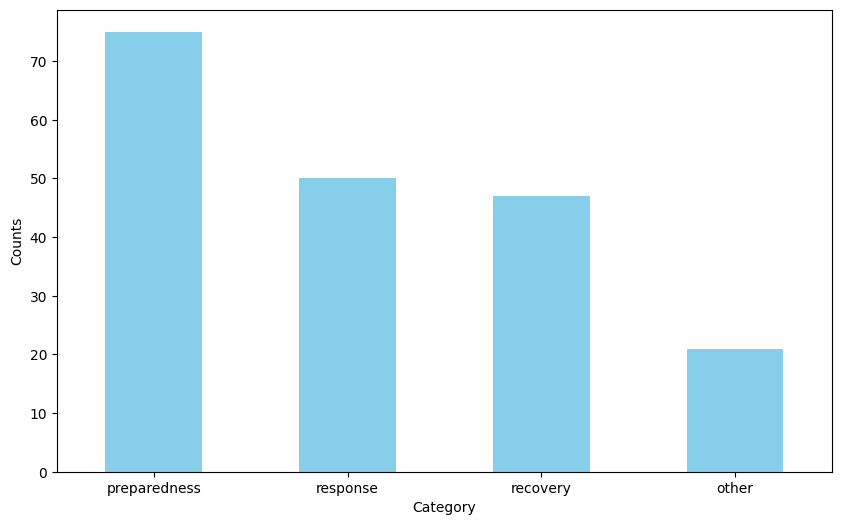

In [4]:
value_counts = screened_refs_details['category'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

## Institutional Analysis

In [9]:
institution_dict = {}

for record in screened_refs_details['authors']:
    temp_set = set()
    record = ast.literal_eval(record)
    for author in record:
        try:
            temp_set.add(author['institutions'][0]['display_name'])
        except:
            continue
    for ins in list(temp_set):
        if ins in institution_dict:
            institution_dict[ins] += 1
        else:
            institution_dict[ins] = 1
            
institution_dict

{'Fundação Oswaldo Cruz': 1,
 "Addenbrooke's Hospital": 1,
 'University of Cambridge': 1,
 "King's College London": 1,
 'Indonesia University of Education': 2,
 'Ministry of Land, Infrastructure, Transport and Tourism': 1,
 'Futuribles International': 1,
 'Organisation For Economic Co-Operation and Development': 1,
 'University of Passau': 1,
 'Philipps University of Marburg': 1,
 'Technical University of Darmstadt': 1,
 'Purdue University West Lafayette': 2,
 'University of Central Florida': 7,
 'Massachusetts Institute of Technology': 1,
 'Florida International University': 1,
 'The Open University of Japan': 1,
 'Bournemouth University': 1,
 'Institute of Occupational Safety': 1,
 'Istanbul Metropolitan Municipality': 1,
 'Lund University': 1,
 'Universidad San Pablo CEU': 1,
 'Universidad Complutense de Madrid': 1,
 'University of Maryland, College Park': 2,
 'Vienna University of Economics and Business': 1,
 'Aston University': 2,
 'State University of Malang': 1,
 'St Petersburg 

In [40]:
institution_dict_category = {}

for i in range(screened_refs_details.shape[0]):
    temp_set = set()
    record = ast.literal_eval(screened_refs_details['authors'].iloc[i])
    for author in record:
        try:
            temp_set.add((author['institutions'][0]['display_name'],screened_refs_details['category'].iloc[i]))
        except:
            continue
    for ins,cat in list(temp_set):
        institution_dict_category[ins] = cat
            
institution_dict_category

{'Fundação Oswaldo Cruz': 'preparedness',
 "King's College London": 'preparedness',
 "Addenbrooke's Hospital": 'preparedness',
 'University of Cambridge': 'preparedness',
 'Indonesia University of Education': 'preparedness',
 'Ministry of Land, Infrastructure, Transport and Tourism': 'preparedness',
 'Organisation For Economic Co-Operation and Development': 'preparedness',
 'Futuribles International': 'preparedness',
 'Philipps University of Marburg': 'response',
 'Technical University of Darmstadt': 'response',
 'University of Passau': 'response',
 'Massachusetts Institute of Technology': 'response',
 'Florida International University': 'response',
 'University of Central Florida': 'other',
 'Purdue University West Lafayette': 'recovery',
 'The Open University of Japan': 'preparedness',
 'Bournemouth University': 'preparedness',
 'Istanbul Metropolitan Municipality': 'preparedness',
 'Institute of Occupational Safety': 'preparedness',
 'Lund University': 'response',
 'Universidad Comp

In [47]:
Counter(list(institution_dict_category.values()))

Counter({'preparedness': 74, 'response': 47, 'other': 10, 'recovery': 37})

In [10]:
np.sum(np.array(list(institution_dict.values())))

184

In [11]:
sorted(institution_dict.items(), key=lambda item: item[1], reverse=True)[:15]

[('University of Central Florida', 7),
 ('Indonesia University of Education', 2),
 ('Purdue University West Lafayette', 2),
 ('University of Maryland, College Park', 2),
 ('Aston University', 2),
 ('University of Amsterdam', 2),
 ('Texas A&M University', 2),
 ('Queensland University of Technology', 2),
 ('City, University of London', 2),
 ('George Mason University', 2),
 ('University of Washington', 2),
 ('Fundação Oswaldo Cruz', 1),
 ("Addenbrooke's Hospital", 1),
 ('University of Cambridge', 1),
 ("King's College London", 1)]

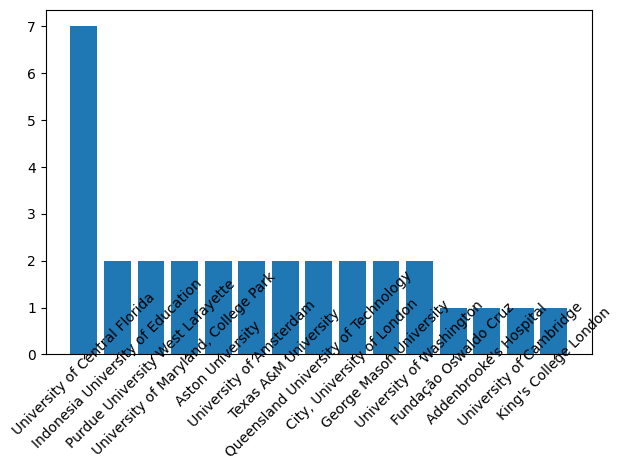

In [12]:
sorted_dict_items = sorted(institution_dict.items(), key=lambda item: item[1], reverse=True)[:15]
labels = [item[0] for item in sorted_dict_items]
values = [item[1] for item in sorted_dict_items]

plt.bar(labels, values)
plt.xticks(rotation=45, ha="center", va="center")
plt.tight_layout()
plt.show()

In [46]:
for i in range(len(screened_refs_details['authors'])):
    record = ast.literal_eval(screened_refs_details['authors'].iloc[i])
    sub_list = []
    for author in record:
        try:
            if author['institutions'][0]['display_name'] == "Aston University":
                print(screened_refs_details['title'].iloc[i])
        except:
            continue

Collation of best practices for preparedness: lessons from disasters in Pakistan and Japan
Collation of best practices for preparedness: lessons from disasters in Pakistan and Japan
Disaster preparedness in humanitarian logistics: A collaborative approach for resource management in floods
Disaster preparedness in humanitarian logistics: A collaborative approach for resource management in floods


In [15]:
rowlevel_institutes_list = []

for record in screened_refs_details['authors']:
    record = ast.literal_eval(record)
    sub_list = set()
    try:
        for author in record:
            sub_list.add(author['institutions'][0]['display_name'])  
        rowlevel_institutes_list.append(list(sub_list))
    except:
        continue

In [50]:
edge_tuple_list = [] 
for lst in rowlevel_institutes_list:
    if len(lst)>0:
        for i in range(len(lst)):
            for j in range(i+1,len(lst)):
                edge_tuple_list.append((lst[i],lst[j]))
    else:
        print(lst)
    
print(len(edge_tuple_list))

[]
[]
[]
[]
[]
[]
75


In [51]:
dict_edge_tuple_list = dict(Counter(edge_tuple_list))

In [52]:
list(dict_edge_tuple_list.keys())

[("Addenbrooke's Hospital", 'University of Cambridge'),
 ("Addenbrooke's Hospital", "King's College London"),
 ('University of Cambridge', "King's College London"),
 ('Futuribles International',
  'Organisation For Economic Co-Operation and Development'),
 ('University of Passau', 'Philipps University of Marburg'),
 ('University of Passau', 'Technical University of Darmstadt'),
 ('Philipps University of Marburg', 'Technical University of Darmstadt'),
 ('Purdue University West Lafayette', 'University of Central Florida'),
 ('Purdue University West Lafayette', 'Massachusetts Institute of Technology'),
 ('Purdue University West Lafayette', 'Florida International University'),
 ('University of Central Florida', 'Massachusetts Institute of Technology'),
 ('University of Central Florida', 'Florida International University'),
 ('Massachusetts Institute of Technology', 'Florida International University'),
 ('The Open University of Japan', 'Bournemouth University'),
 ('Universidad San Pablo CEU

In [20]:
import matplotlib.pyplot as plt_lib

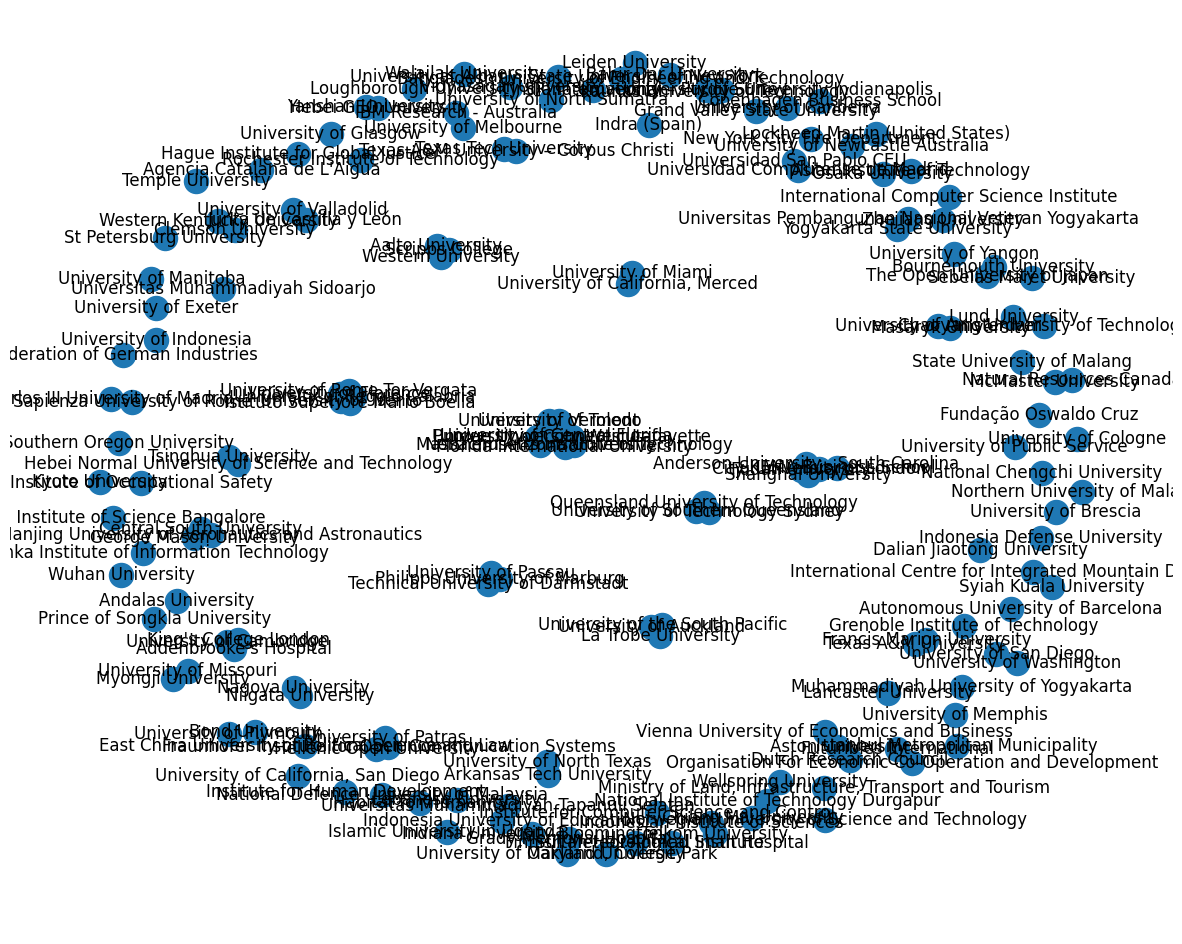

In [21]:
G = nx.Graph()

node_list = list(institution_dict.keys())

G.add_nodes_from(node_list)

fig, ax = plt_lib.subplots(figsize=(15, 12))

for edge, weight in dict_edge_tuple_list.items():
    G.add_edge(edge[0], edge[1], weight=weight)

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt_lib.show()

In [58]:
encoded_institution_dict_category = {}
encoder = {}
count = 0

for ins,cat in institution_dict_category.items():
    count += 1
    encoder[ins] = count
    encoded_institution_dict_category[count] = cat
    
encoded_institution_dict_category

{1: 'preparedness',
 2: 'preparedness',
 3: 'preparedness',
 4: 'preparedness',
 5: 'preparedness',
 6: 'preparedness',
 7: 'preparedness',
 8: 'preparedness',
 9: 'response',
 10: 'response',
 11: 'response',
 12: 'response',
 13: 'response',
 14: 'other',
 15: 'recovery',
 16: 'preparedness',
 17: 'preparedness',
 18: 'preparedness',
 19: 'preparedness',
 20: 'response',
 21: 'response',
 22: 'response',
 23: 'response',
 24: 'preparedness',
 25: 'preparedness',
 26: 'preparedness',
 27: 'preparedness',
 28: 'preparedness',
 29: 'preparedness',
 30: 'preparedness',
 31: 'recovery',
 32: 'recovery',
 33: 'preparedness',
 34: 'recovery',
 35: 'recovery',
 36: 'other',
 37: 'other',
 38: 'preparedness',
 39: 'response',
 40: 'recovery',
 41: 'recovery',
 42: 'preparedness',
 43: 'preparedness',
 44: 'recovery',
 45: 'response',
 46: 'recovery',
 47: 'recovery',
 48: 'response',
 49: 'response',
 50: 'recovery',
 51: 'recovery',
 52: 'response',
 53: 'response',
 54: 'preparedness',
 55:

In [59]:
encoder

{'Fundação Oswaldo Cruz': 1,
 "King's College London": 2,
 "Addenbrooke's Hospital": 3,
 'University of Cambridge': 4,
 'Indonesia University of Education': 5,
 'Ministry of Land, Infrastructure, Transport and Tourism': 6,
 'Organisation For Economic Co-Operation and Development': 7,
 'Futuribles International': 8,
 'Philipps University of Marburg': 9,
 'Technical University of Darmstadt': 10,
 'University of Passau': 11,
 'Massachusetts Institute of Technology': 12,
 'Florida International University': 13,
 'University of Central Florida': 14,
 'Purdue University West Lafayette': 15,
 'The Open University of Japan': 16,
 'Bournemouth University': 17,
 'Istanbul Metropolitan Municipality': 18,
 'Institute of Occupational Safety': 19,
 'Lund University': 20,
 'Universidad Complutense de Madrid': 21,
 'Universidad San Pablo CEU': 22,
 'University of Maryland, College Park': 23,
 'Aston University': 24,
 'Vienna University of Economics and Business': 25,
 'State University of Malang': 26,

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_6260\3491159224.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(categories))


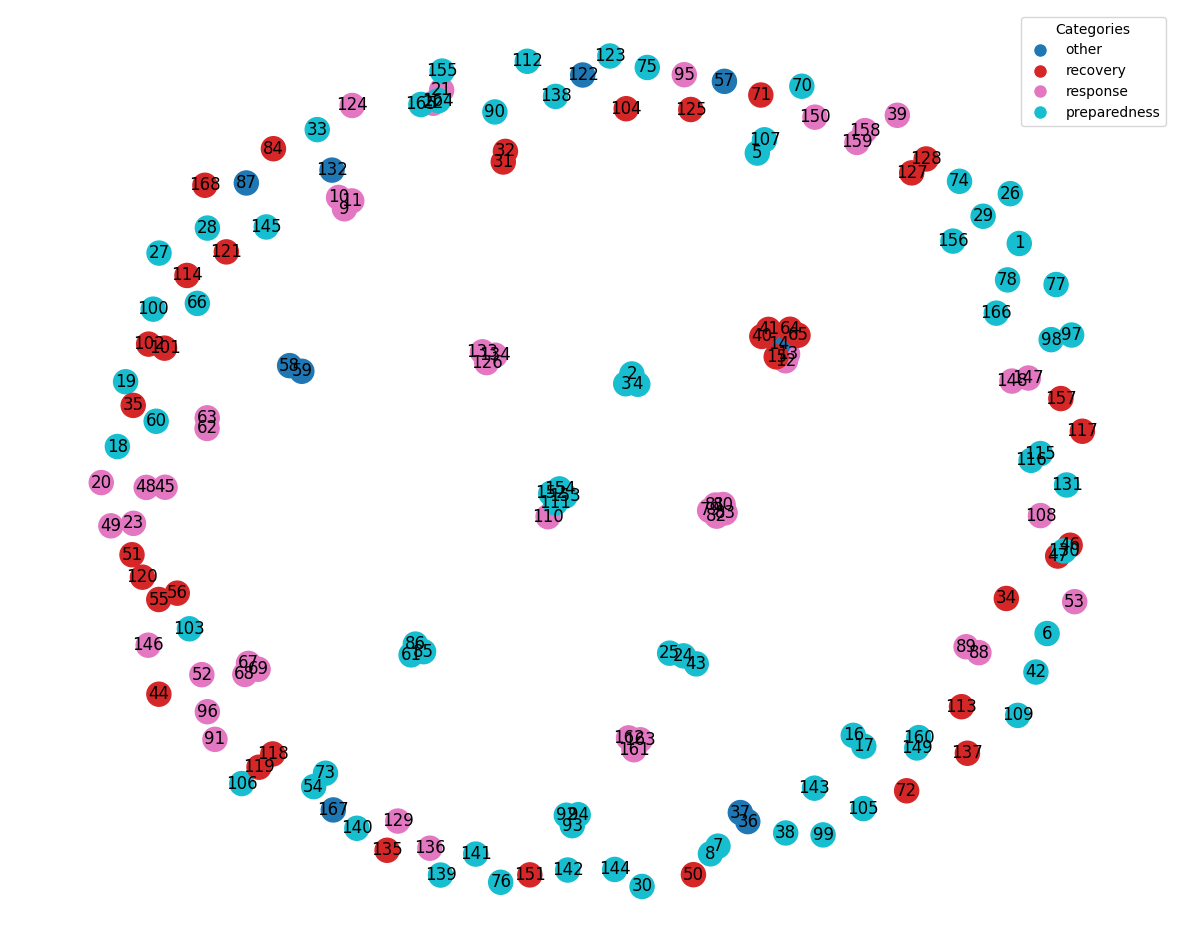

In [61]:
import matplotlib.pyplot as plt_lib1
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

G = nx.Graph()

node_list = list(encoded_institution_dict_category.keys())
G.add_nodes_from(node_list)

for edge in dict_edge_tuple_list.keys():
    G.add_edge(encoder[edge[0]], encoder[edge[1]])

categories = set(encoded_institution_dict_category.values())
cmap = cm.get_cmap('tab10', len(categories))  
category_colors = {category: cmap(i) for i, category in enumerate(categories)}

node_colors = [category_colors[encoded_institution_dict_category[node]] for node in G.nodes()]

for node in G.nodes():
    G.nodes[node]['category'] = encoded_institution_dict_category[node]

nx.write_gexf(G, 'network_graph.gexf')

fig, ax = plt_lib1.subplots(figsize=(15, 12))
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color=node_colors, ax=ax)

handles = [plt_lib1.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category)
           for category, color in category_colors.items()]
ax.legend(handles=handles, title='Categories')

plt_lib1.show()

In [22]:
degree_centrality_results = nx.degree_centrality(G)
print("Degree centrality measurement results: ", degree_centrality_results)

betweenness_centrality_results = nx.betweenness_centrality(G, weight='weight')
print("Betweenness centrality measurement results: ", betweenness_centrality_results)

load_centrality_results = nx.load_centrality(G, weight='weight')
print("Load Centrality measurement results", load_centrality_results)

eigenvector_centrality_results = nx.eigenvector_centrality_numpy(G, weight='weight')
print("Eigenvector Centrality measurement results: ", eigenvector_centrality_results)

edge_betweenness_centrality_results = nx.edge_betweenness_centrality(G, weight='weight')
print("Edge Betweenness Centrality measurement results: ", edge_betweenness_centrality_results)

closeness_centrality_results = nx.closeness_centrality(G, distance='weight')
print("Closeness centrality measurement results: ", closeness_centrality_results)

Degree centrality measurement results:  {'Fundação Oswaldo Cruz': 0.0, "Addenbrooke's Hospital": 0.011976047904191617, 'University of Cambridge': 0.011976047904191617, "King's College London": 0.011976047904191617, 'Indonesia University of Education': 0.005988023952095809, 'Ministry of Land, Infrastructure, Transport and Tourism': 0.0, 'Futuribles International': 0.005988023952095809, 'Organisation For Economic Co-Operation and Development': 0.005988023952095809, 'University of Passau': 0.011976047904191617, 'Philipps University of Marburg': 0.011976047904191617, 'Technical University of Darmstadt': 0.011976047904191617, 'Purdue University West Lafayette': 0.017964071856287428, 'University of Central Florida': 0.04191616766467066, 'Massachusetts Institute of Technology': 0.017964071856287428, 'Florida International University': 0.017964071856287428, 'The Open University of Japan': 0.005988023952095809, 'Bournemouth University': 0.005988023952095809, 'Institute of Occupational Safety': 

In [24]:
node_degrees = dict(nx.degree(G, weight='weight'))

print(node_degrees)

total_degree = np.sum(np.array(list(node_degrees.values())))
average_degree =  total_degree / len(node_degrees)

print("Average Degree:", average_degree)

{'Fundação Oswaldo Cruz': 0, "Addenbrooke's Hospital": 2, 'University of Cambridge': 2, "King's College London": 2, 'Indonesia University of Education': 1, 'Ministry of Land, Infrastructure, Transport and Tourism': 0, 'Futuribles International': 1, 'Organisation For Economic Co-Operation and Development': 1, 'University of Passau': 2, 'Philipps University of Marburg': 2, 'Technical University of Darmstadt': 2, 'Purdue University West Lafayette': 3, 'University of Central Florida': 7, 'Massachusetts Institute of Technology': 3, 'Florida International University': 3, 'The Open University of Japan': 1, 'Bournemouth University': 1, 'Institute of Occupational Safety': 0, 'Istanbul Metropolitan Municipality': 0, 'Lund University': 0, 'Universidad San Pablo CEU': 1, 'Universidad Complutense de Madrid': 1, 'University of Maryland, College Park': 1, 'Vienna University of Economics and Business': 1, 'Aston University': 2, 'State University of Malang': 0, 'St Petersburg University': 0, 'Universit

In [25]:
densities = []

for node in G.nodes():
    degree = 0
    for value in [d['weight'] for _, _, d in G.edges(node, data=True)]:
        degree =+ value
    density = degree / (len(G) - 1)
    densities.append([node, density])

densities = np.array(densities)

In [26]:
highest_density_node = densities[np.where(densities[:,1].astype(float) == np.max(densities[:,1].astype(float))), :][0][0][0]
print("Highet density node: ", highest_density_node)

smallest_density_node = densities[np.where(densities[:,1].astype(float) == np.min(densities[:,1].astype(float))), :][0][0][0]
print("Smallest density node: ", smallest_density_node)

Highet density node:  Addenbrooke's Hospital
Smallest density node:  Fundação Oswaldo Cruz


In [27]:
connected_components = list(nx.connected_components(G))

print("Connected components:", connected_components)

Connected components: [{'Fundação Oswaldo Cruz'}, {"Addenbrooke's Hospital", 'University of Cambridge', "King's College London"}, {'Universitas Muhammadiyah Tapanuli Selatan', 'Indonesia University of Education'}, {'Ministry of Land, Infrastructure, Transport and Tourism'}, {'Futuribles International', 'Organisation For Economic Co-Operation and Development'}, {'Technical University of Darmstadt', 'Philipps University of Marburg', 'University of Passau'}, {'University of Central Florida', 'Massachusetts Institute of Technology', 'University of Vermont', 'University of Toledo', 'Purdue University West Lafayette', 'Northern Arizona University', 'Florida International University', 'University of Connecticut'}, {'The Open University of Japan', 'Bournemouth University'}, {'Institute of Occupational Safety'}, {'Istanbul Metropolitan Municipality'}, {'Lund University'}, {'Universidad San Pablo CEU', 'Universidad Complutense de Madrid'}, {'Grady Memorial Hospital', 'University of Maryland, Col

In [28]:
len(connected_components)

114

In [29]:
pos = nx.spring_layout(G, k=None, iterations=50)

In [30]:
sorted_connected_components = sorted(connected_components, key=lambda s: len(s), reverse=True)

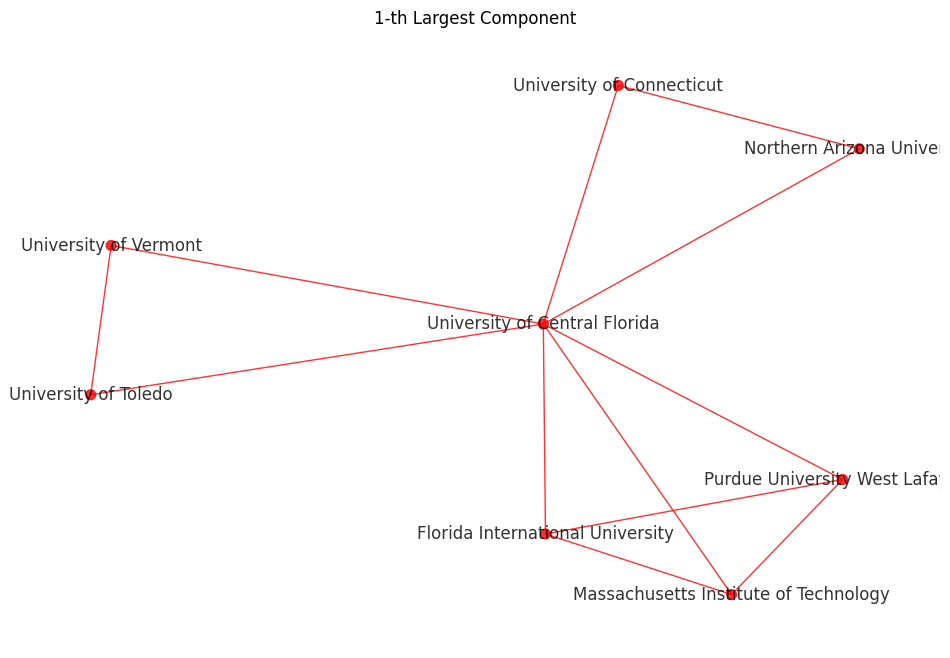

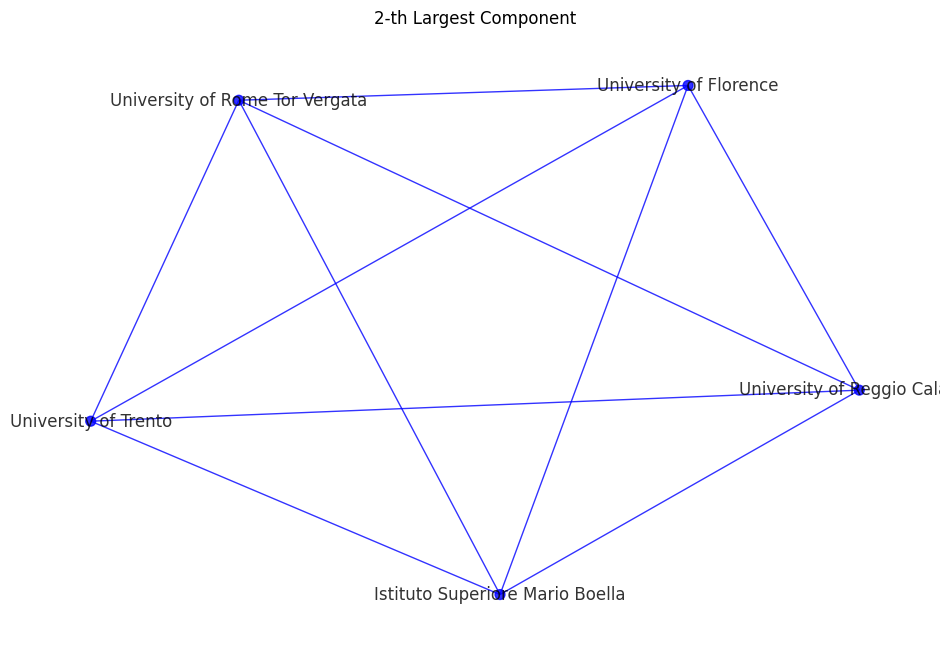

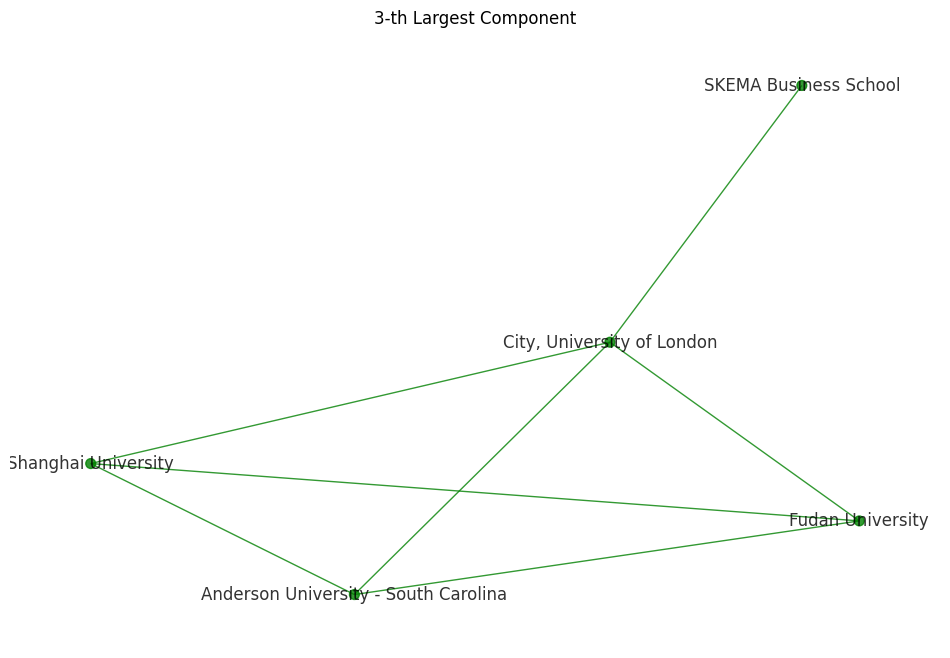

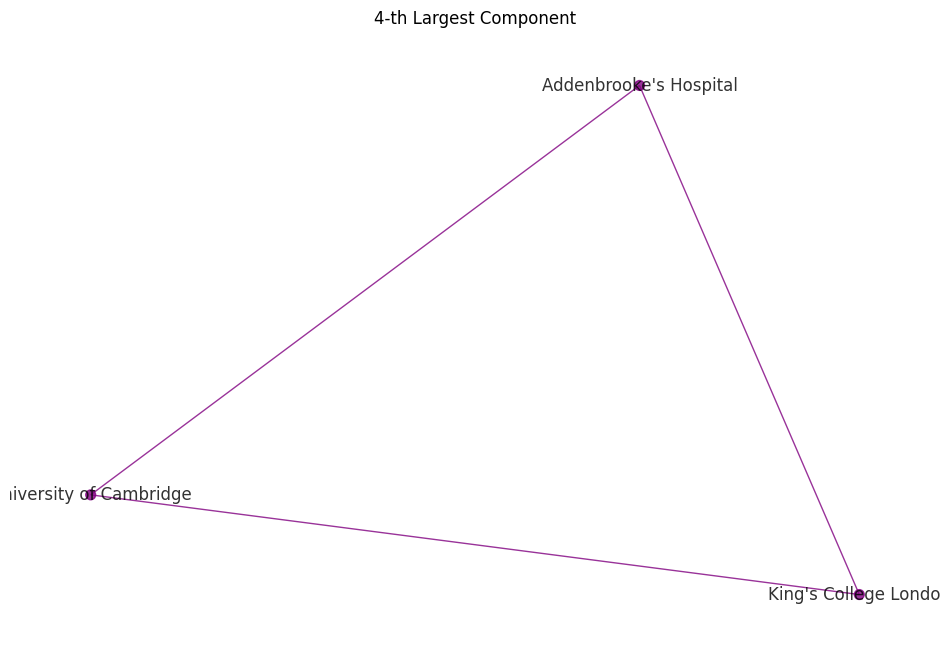

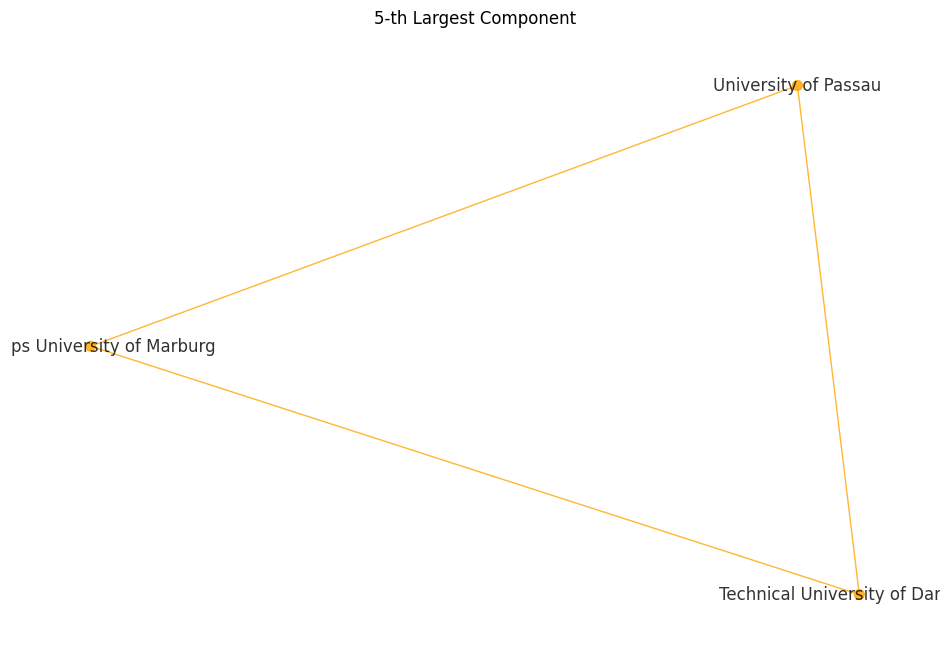

In [31]:
color_list = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    plt.figure(figsize=(12, 8))
    component = G.subgraph(sorted_connected_components[i])
    color_map = [color_list[i] for _ in range(len(component.nodes))]
    
    nx.draw_networkx(
        component, pos, node_size=50, node_color=color_map, 
        edge_color=color_list[i], with_labels=True, alpha=0.8
    )
    
    plt.title(f"{i+1}-th Largest Component")
    plt.axis('off')
    plt.show()

In [32]:
clustering_coeffs = nx.clustering(G)

average_clustering = nx.average_clustering(G)

print("Clustering Coefficient for each node:")
for node, coeff in clustering_coeffs.items():
    print(f"Node {node}: {coeff}")

print(f"\nAverage Clustering Coefficient: {average_clustering}")

Clustering Coefficient for each node:
Node Fundação Oswaldo Cruz: 0
Node Addenbrooke's Hospital: 1.0
Node University of Cambridge: 1.0
Node King's College London: 1.0
Node Indonesia University of Education: 0
Node Ministry of Land, Infrastructure, Transport and Tourism: 0
Node Futuribles International: 0
Node Organisation For Economic Co-Operation and Development: 0
Node University of Passau: 1.0
Node Philipps University of Marburg: 1.0
Node Technical University of Darmstadt: 1.0
Node Purdue University West Lafayette: 1.0
Node University of Central Florida: 0.23809523809523808
Node Massachusetts Institute of Technology: 1.0
Node Florida International University: 1.0
Node The Open University of Japan: 0
Node Bournemouth University: 0
Node Institute of Occupational Safety: 0
Node Istanbul Metropolitan Municipality: 0
Node Lund University: 0
Node Universidad San Pablo CEU: 0
Node Universidad Complutense de Madrid: 0
Node University of Maryland, College Park: 0
Node Vienna University of Ec

In [385]:
screened_refs_details['authors']

1      [{'author_position': 'first', 'author': {'id':...
9      [{'author_position': 'first', 'author': {'id':...
10                                                    []
14     [{'author_position': 'first', 'author': {'id':...
19     [{'author_position': 'first', 'author': {'id':...
                             ...                        
526    [{'author_position': 'first', 'author': {'id':...
528    [{'author_position': 'first', 'author': {'id':...
529    [{'author_position': 'first', 'author': {'id':...
530    [{'author_position': 'first', 'author': {'id':...
531    [{'author_position': 'first', 'author': {'id':...
Name: authors, Length: 193, dtype: object

In [125]:
sorted_dict_items = sorted(institution_dict.items(), key=lambda item: item[1], reverse=True)[:30]

In [126]:
top_30_institutes_list = [t[0] for t in sorted_dict_items]
top_30_institutes_list

['Rochester Institute of Technology',
 'University of Central Florida',
 'National Institute of Technology Durgapur',
 'Western Kentucky University',
 'Yogyakarta State University',
 'Indonesia University of Education',
 'Technical University of Darmstadt',
 'Sri Lanka Institute of Information Technology',
 'La Trobe University',
 'National Defence University of Malaysia',
 'Osaka University',
 'George Mason University',
 'Indonesia Defense University',
 'Fundação Oswaldo Cruz',
 'University of Maryland, College Park',
 'Aston University',
 'State University of Malang',
 'Indonesian Institute of Sciences',
 'University of Florence',
 'Carlos III University of Madrid',
 'Chiang Mai University',
 'Hebei GEO University',
 'Muhammadiyah University of Yogyakarta',
 'University of Cologne',
 'University of Washington',
 'Hellenic Open University',
 'Ministry of Land, Infrastructure, Transport and Tourism',
 'Purdue University West Lafayette',
 'University of North Sumatra',
 'Chaoyang Univer

In [133]:
top_30_institutes_node_degrees = {}
top_30_institutes_degree_centrality_results = {}
top_30_institutes_betweenness_centrality_results = {}
top_30_institutes_eigenvector_centrality_results = {}
top_30_institutes_closeness_centrality_results = {}

for ins in top_30_institutes_list:
    top_30_institutes_node_degrees[ins] = node_degrees[ins]
    top_30_institutes_degree_centrality_results[ins] = degree_centrality_results[ins]
    top_30_institutes_betweenness_centrality_results[ins] = betweenness_centrality_results[ins]
    top_30_institutes_eigenvector_centrality_results[ins] = eigenvector_centrality_results[ins] 
    top_30_institutes_closeness_centrality_results[ins] = closeness_centrality_results[ins]

In [202]:
top_30_institutes_degree_centrality_results

{'Rochester Institute of Technology': 0.011976047904191617,
 'University of Central Florida': 0.05389221556886228,
 'National Institute of Technology Durgapur': 0.011976047904191617,
 'Western Kentucky University': 0.017964071856287428,
 'Yogyakarta State University': 0.017964071856287428,
 'Indonesia University of Education': 0.017964071856287428,
 'Technical University of Darmstadt': 0.023952095808383235,
 'Sri Lanka Institute of Information Technology': 0.011976047904191617,
 'La Trobe University': 0.023952095808383235,
 'National Defence University of Malaysia': 0.011976047904191617,
 'Osaka University': 0.011976047904191617,
 'George Mason University': 0.023952095808383235,
 'Indonesia Defense University': 0.011976047904191617,
 'Fundação Oswaldo Cruz': 0.011976047904191617,
 'University of Maryland, College Park': 0.017964071856287428,
 'Aston University': 0.023952095808383235,
 'State University of Malang': 0.011976047904191617,
 'Indonesian Institute of Sciences': 0.01796407185

In [146]:
max_total_degree = (len(G) - 1) * (len(G) - 2)

total_degree = np.sum(np.array(list(degree_centrality_results.values())))

network_centralization = (max_total_degree - total_degree) / (len(G) - 1)**2

print("Network centralization:", network_centralization)

Network centralization: 0.9939479927162063


In [148]:
total_degree = np.sum(np.array(list(closeness_centrality_results.values())))

network_centralization = (total_degree * (2*len(G) - 3))/(len(G)-2)

print("Network centralization:", network_centralization)

Network centralization: 1.2306454841841898


## Concept Analysis

In [3]:
screened_refs_details

doi  \
0                https://doi.org/10.1002/9781444314885   
1           https://doi.org/10.1007/s43615-021-00060-x   
2                   https://doi.org/10.7176/nmmc/96-05   
3              https://doi.org/10.1093/bjs/znab134.185   
4       https://doi.org/10.1088/1755-1315/145/1/012103   
..                                                 ...   
188  https://doi.org/10.24940/theijhss/2020/v8/i4/h...   
189            https://doi.org/10.4236/jss.2020.810004   
190  https://doi.org/10.25392/leicester.data.133227...   
191       https://doi.org/10.1007/978-3-030-38040-3_87   
192    https://doi.org/10.4018/978-1-7998-3473-1.ch151   

                                  ids      category  \
0     https://openalex.org/W268257668         other   
1    https://openalex.org/W3173683644  preparedness   
2    https://openalex.org/W4249864866      response   
3    https://openalex.org/W3162876202  preparedness   
4    https://openalex.org/W2801985200      recovery   
..                                ...           ...   
188  https://openalex.org/W3195643002      recovery   
189  https://openalex.org/W3092063757  preparedness   
190  https://openalex.org/W3213488429  preparedness   
191  https://openalex.org/W3003192696         other   
192  https://openalex.org/W3122809911      recovery   

                                                 title publication_data  \
0                 The Handbook of Crisis Communication       2010-01-19   
1    COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
2    Social Media as Amedium of Crisis Communicatio...       2021-01-05   
3    986 A Systematic Review of Medical Student Wil...       2021-01-05   
4    The Preparedness Level of Community in Facing ...       2018-01-04   
..                                                 ...              ...   
188  Professional Perspectives on the Use of a Cris...       2020-10-13   
189  Meteorological Indigenous Knowledge Systems fo...       2020-01-01   
190  Crisis Communication in China: Strategies take...       2020-02-12   
191  Tweets Analysis for Disaster Management: Prepa...       2020-01-01   
192  Crisis Communication in the Age of Social Medi...       2021-01-01   

    language                                            journal  \
0         en                                       Wiley eBooks   
1         en                Circular Economy and Sustainability   
2         en                   New Media and Mass Communication   
3         en                         British Journal of Surgery   
4         en                              IOP conference series   
..       ...                                                ...   
188       en  International journal of humanities & social s...   
189       en                    Open Journal of Social Sciences   
190       en                                                NaN   
191       en  Lecture notes on data engineering and communic...   
192       en  Advances in logistics, operations, and managem...   

                                               authors  \
0    [{'author_position': 'first', 'author': {'id':...   
1    [{'author_position': 'first', 'author': {'id':...   
2                                                   []   
3    [{'author_position': 'first', 'author': {'id':...   
4    [{'author_position': 'first', 'author': {'id':...   
..                                                 ...   
188  [{'author_position': 'first', 'author': {'id':...   
189  [{'author_position': 'first', 'author': {'id':...   
190  [{'author_position': 'first', 'author': {'id':...   
191  [{'author_position': 'first', 'author': {'id':...   
192  [{'author_position': 'first', 'author': {'id':...   

                                              keywords  \
0    [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
1    [{'keyword': 'pandemic preparedness', 'score':...   
2    [{'keyword': 'social media', 'score': 0.5196},...   
3    [{'keyword': 'medical student willingness', 's...   


In [4]:
concept_dict = {}
for record in screened_refs_details['concepts']:
    record = ast.literal_eval(record)
    for data in record:
        if data['display_name'] in concept_dict:
            concept_dict[data['display_name']] += 1
        else:
            concept_dict[data['display_name']] = 1
    
concept_dict

{'Crisis communication': 69,
 'Computer science': 121,
 'Political science': 175,
 'Public relations': 97,
 'Pandemic': 8,
 'Preparedness': 71,
 'Public health': 4,
 'Global health': 1,
 'Population': 8,
 'Development economics': 3,
 'International Health Regulations': 1,
 'Economic growth': 16,
 'Business': 95,
 'Infectious disease (medical specialty)': 11,
 'Disease': 11,
 'Environmental health': 6,
 'Geography': 68,
 'Coronavirus disease 2019 (COVID-19)': 10,
 'Medicine': 24,
 'Economics': 32,
 'Nursing': 7,
 'Pathology': 13,
 'Law': 151,
 'Social media': 44,
 'Popularity': 2,
 'Software portability': 1,
 'Digital media': 2,
 'New media': 1,
 'Advertising': 9,
 'Internet privacy': 12,
 'Sociology': 53,
 'World Wide Web': 32,
 'Programming language': 12,
 'Curriculum': 1,
 'Inclusion (mineral)': 1,
 'Volunteer': 1,
 'Medical education': 3,
 'Disaster medicine': 1,
 'Significant difference': 1,
 'Family medicine': 2,
 'Medical emergency': 5,
 'Suicide prevention': 1,
 'Poison control'

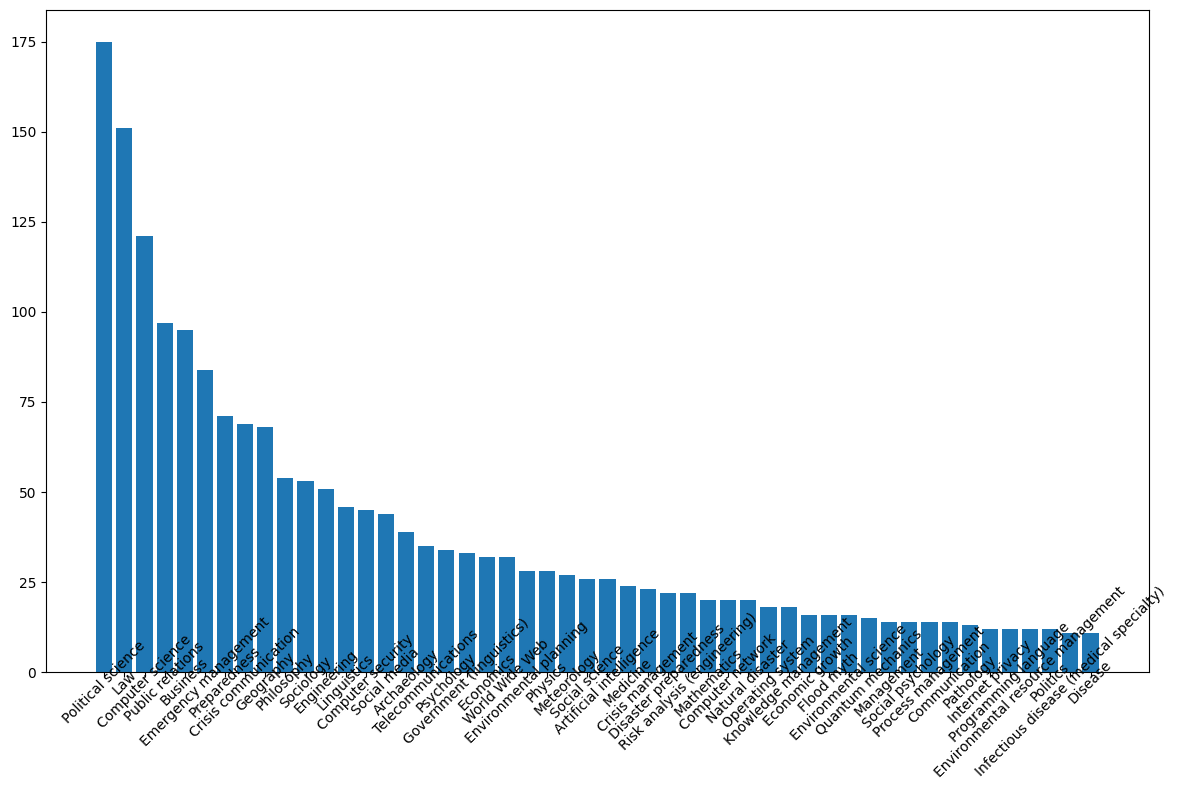

In [270]:
sorted_dict_items = sorted(concept_dict.items(), key=lambda item: item[1], reverse=True)[:50]
labels = [item[0] for item in sorted_dict_items]
values = [item[1] for item in sorted_dict_items]

plt.figure(figsize=(12,8))
plt.bar(labels, values)
#bars = plt.bar(labels, values)
#for bar, value in zip(bars, values):
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}', 
#             ha='center', va='bottom', rotation=0, fontsize=10)
plt.xticks(rotation=45, ha="center", va="center")
plt.tight_layout()
plt.show()

In [271]:
ast.literal_eval(screened_refs_details['concepts'].iloc[0])

[{'id': 'https://openalex.org/C2776058685',
  'wikidata': 'https://www.wikidata.org/wiki/Q378874',
  'display_name': 'Crisis communication',
  'level': 2,
  'score': 0.52261645},
 {'id': 'https://openalex.org/C41008148',
  'wikidata': 'https://www.wikidata.org/wiki/Q21198',
  'display_name': 'Computer science',
  'level': 0,
  'score': 0.3297472},
 {'id': 'https://openalex.org/C17744445',
  'wikidata': 'https://www.wikidata.org/wiki/Q36442',
  'display_name': 'Political science',
  'level': 0,
  'score': 0.29296714},
 {'id': 'https://openalex.org/C39549134',
  'wikidata': 'https://www.wikidata.org/wiki/Q133080',
  'display_name': 'Public relations',
  'level': 1,
  'score': 0.10266617}]

In [272]:
rowlevel_concepts_list = []
for record in screened_refs_details['concepts']:
    sublevel_concept_list = []
    record = ast.literal_eval(record)
    for data in record:
        sublevel_concept_list.append(data['display_name'])
    rowlevel_concepts_list.append(sublevel_concept_list)

In [273]:
len(rowlevel_concepts_list)

193

In [274]:
edge_tuple_list = [] 
for lst in rowlevel_concepts_list:
    if len(lst)>1:
        for i in range(len(lst)):
            for j in range(i+1,len(lst)):
                edge_tuple_list.append((lst[i],lst[j]))
    
print(len(edge_tuple_list))

27244


In [275]:
dict_edge_tuple_list = dict(Counter(edge_tuple_list))

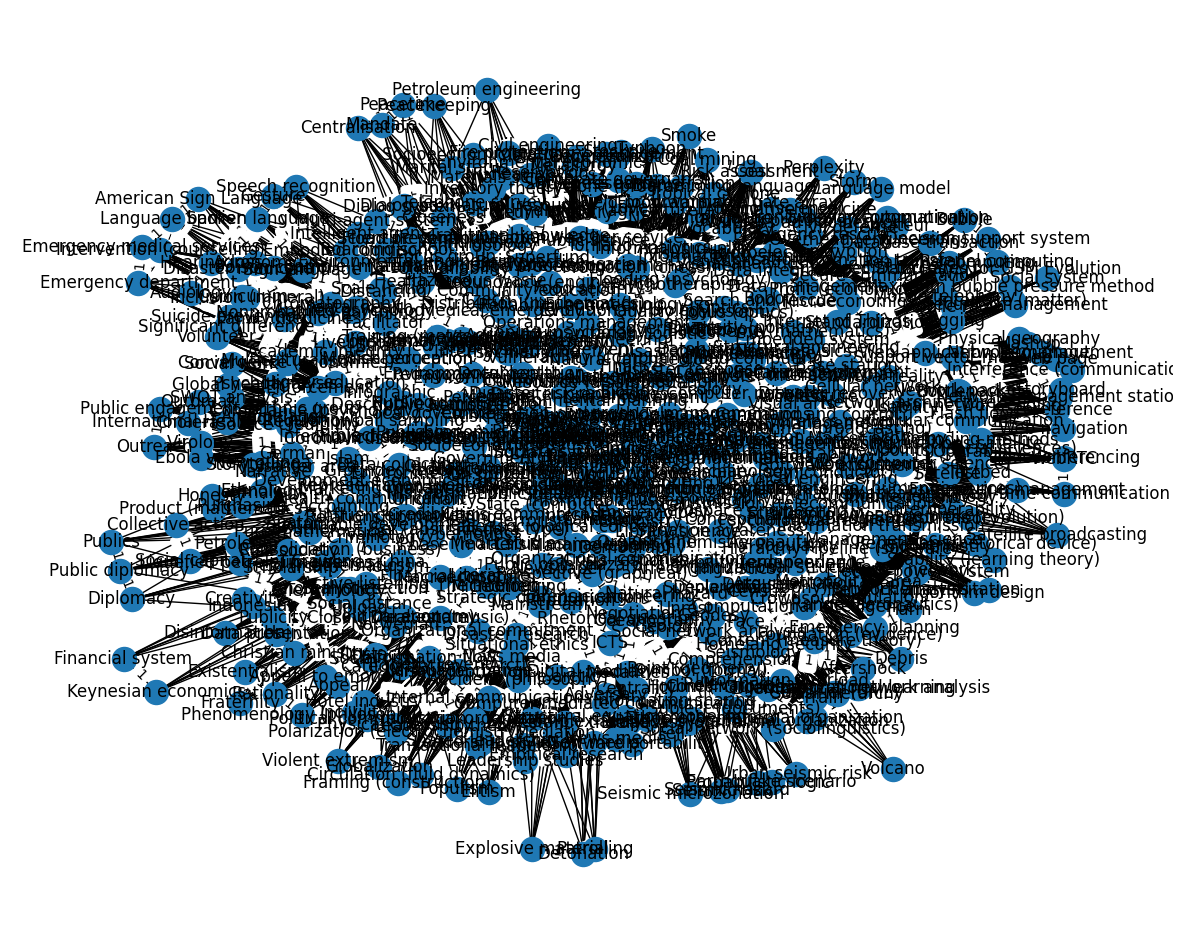

In [276]:
G = nx.Graph()

node_list = list(concept_dict.keys())

G.add_nodes_from(node_list)

fig, ax = plt_lib.subplots(figsize=(15, 12))

for edge, weight in dict_edge_tuple_list.items():
    G.add_edge(edge[0], edge[1], weight=weight)

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt_lib.show()

In [277]:
degree_centrality_results = nx.degree_centrality(G)
print("Degree centrality measurement results: ", degree_centrality_results)

betweenness_centrality_results = nx.betweenness_centrality(G, weight='weight')
print("Betweenness centrality measurement results: ", betweenness_centrality_results)

load_centrality_results = nx.load_centrality(G, weight='weight')
print("Load Centrality measurement results", load_centrality_results)

eigenvector_centrality_results = nx.eigenvector_centrality_numpy(G, weight='weight')
print("Eigenvector Centrality measurement results: ", eigenvector_centrality_results)

edge_betweenness_centrality_results = nx.edge_betweenness_centrality(G, weight='weight')
print("Edge Betweenness Centrality measurement results: ", edge_betweenness_centrality_results)

closeness_centrality_results = nx.closeness_centrality(G, distance='weight')
print("Closeness centrality measurement results: ", closeness_centrality_results)

Degree centrality measurement results:  {'Crisis communication': 0.3944805194805195, 'Computer science': 0.8003246753246753, 'Political science': 0.9058441558441559, 'Public relations': 0.538961038961039, 'Pandemic': 0.137987012987013, 'Preparedness': 0.47240259740259744, 'Public health': 0.07629870129870131, 'Global health': 0.030844155844155847, 'Population': 0.14610389610389612, 'Development economics': 0.053571428571428575, 'International Health Regulations': 0.030844155844155847, 'Economic growth': 0.20941558441558442, 'Business': 0.5211038961038962, 'Infectious disease (medical specialty)': 0.17370129870129872, 'Disease': 0.17370129870129872, 'Environmental health': 0.1038961038961039, 'Geography': 0.4902597402597403, 'Coronavirus disease 2019 (COVID-19)': 0.16558441558441558, 'Medicine': 0.33766233766233766, 'Economics': 0.3522727272727273, 'Nursing': 0.12824675324675325, 'Pathology': 0.21103896103896105, 'Law': 0.8733766233766235, 'Social media': 0.3425324675324676, 'Popularity

Betweenness centrality measurement results:  {'Crisis communication': 0.01869098159796584, 'Computer science': 0.10094100506141382, 'Political science': 0.09823214377009139, 'Public relations': 0.03204202736219673, 'Pandemic': 0.0014001151892224185, 'Preparedness': 0.02611730587099716, 'Public health': 0.00036430779846324774, 'Global health': 5.934935198465622e-05, 'Population': 0.0017226336312236587, 'Development economics': 0.00014478790760784913, 'International Health Regulations': 5.934935198465622e-05, 'Economic growth': 0.0035453023216301194, 'Business': 0.0246944770840004, 'Infectious disease (medical specialty)': 0.0021766645050896576, 'Disease': 0.0018523455033708264, 'Environmental health': 0.0008292075134988668, 'Geography': 0.02210420576366188, 'Coronavirus disease 2019 (COVID-19)': 0.0021602690977740595, 'Medicine': 0.017596587174455804, 'Economics': 0.015746545767043024, 'Nursing': 0.0019910686043885383, 'Pathology': 0.003568408145843933, 'Law': 0.08143258012585433, 'Soci

Load Centrality measurement results {'Crisis communication': 0.01887211959175308, 'Computer science': 0.1008204699224645, 'Political science': 0.09786632079735044, 'Public relations': 0.03222295223785981, 'Pandemic': 0.0013415708612205934, 'Preparedness': 0.026554765612684588, 'Public health': 0.00035475682264341624, 'Global health': 3.9909083902899094e-05, 'Population': 0.0016215777193213101, 'Development economics': 0.00014103416154099906, 'International Health Regulations': 3.9909083902899094e-05, 'Economic growth': 0.003532961025202298, 'Business': 0.02484842402102247, 'Infectious disease (medical specialty)': 0.002159802774072425, 'Disease': 0.0018819357388938237, 'Environmental health': 0.0007969447163270218, 'Geography': 0.022202551740101648, 'Coronavirus disease 2019 (COVID-19)': 0.0021037910447790063, 'Medicine': 0.01759356633523115, 'Economics': 0.015645684301540185, 'Nursing': 0.002029345348169537, 'Pathology': 0.0035494929556219097, 'Law': 0.0812987016522316, 'Social media'

Edge Betweenness Centrality measurement results:  {('Crisis communication', 'Computer science'): 0.000716136053872497, ('Crisis communication', 'Political science'): 0.0, ('Crisis communication', 'Public relations'): 0.0, ('Crisis communication', 'Social media'): 0.0, ('Crisis communication', 'Popularity'): 0.0002357476402531546, ('Crisis communication', 'Software portability'): 0.0002099317975387523, ('Crisis communication', 'Digital media'): 2.6856590312801647e-06, ('Crisis communication', 'New media'): 0.00020993179753875233, ('Crisis communication', 'Advertising'): 0.0, ('Crisis communication', 'Internet privacy'): 0.0, ('Crisis communication', 'Sociology'): 0.0, ('Crisis communication', 'Business'): 0.0, ('Crisis communication', 'World Wide Web'): 0.0, ('Crisis communication', 'Law'): 0.0, ('Crisis communication', 'Programming language'): 7.847099901607097e-07, ('Crisis communication', 'Influencer marketing'): 0.0003053530915700685, ('Crisis communication', 'Coronavirus disease 20

Closeness centrality measurement results:  {'Crisis communication': 0.5746268656716418, 'Computer science': 0.6929133858267716, 'Political science': 0.7056128293241696, 'Public relations': 0.5945945945945946, 'Pandemic': 0.5233644859813084, 'Preparedness': 0.5708989805375347, 'Public health': 0.5124792013311148, 'Global health': 0.49838187702265374, 'Population': 0.5287553648068669, 'Development economics': 0.4670204700530705, 'International Health Regulations': 0.49838187702265374, 'Economic growth': 0.5365853658536586, 'Business': 0.5767790262172284, 'Infectious disease (medical specialty)': 0.5301204819277109, 'Disease': 0.5229202037351444, 'Environmental health': 0.5198312236286919, 'Geography': 0.5778611632270169, 'Coronavirus disease 2019 (COVID-19)': 0.5292096219931272, 'Medicine': 0.5708989805375347, 'Economics': 0.5682656826568265, 'Nursing': 0.5229202037351444, 'Pathology': 0.537521815008726, 'Law': 0.6844444444444444, 'Social media': 0.5620437956204379, 'Popularity': 0.50783

In [278]:
node_degrees = dict(nx.degree(G, weight='weight'))

print(node_degrees)

total_degree = np.sum(np.array(list(node_degrees.values())))
average_degree =  total_degree / len(degrees)

print("Average Degree:", average_degree)

{'Crisis communication': 575, 'Computer science': 1133, 'Political science': 1393, 'Public relations': 912, 'Pandemic': 158, 'Preparedness': 875, 'Public health': 72, 'Global health': 19, 'Population': 121, 'Development economics': 47, 'International Health Regulations': 19, 'Economic growth': 251, 'Business': 921, 'Infectious disease (medical specialty)': 195, 'Disease': 209, 'Environmental health': 94, 'Geography': 767, 'Coronavirus disease 2019 (COVID-19)': 180, 'Medicine': 360, 'Economics': 424, 'Nursing': 114, 'Pathology': 248, 'Law': 1650, 'Social media': 488, 'Popularity': 35, 'Software portability': 15, 'Digital media': 22, 'New media': 15, 'Advertising': 128, 'Internet privacy': 177, 'Sociology': 626, 'World Wide Web': 383, 'Programming language': 228, 'Curriculum': 23, 'Inclusion (mineral)': 23, 'Volunteer': 23, 'Medical education': 66, 'Disaster medicine': 23, 'Significant difference': 23, 'Family medicine': 36, 'Medical emergency': 86, 'Suicide prevention': 23, 'Poison cont

In [279]:
densities = []

for node in G.nodes():
    degree = 0
    for value in [d['weight'] for _, _, d in G.edges(node, data=True)]:
        degree =+ value
    density = degree / (len(G) - 1)
    densities.append([node, density])

densities = np.array(densities)

In [280]:
densities

array([['Crisis communication', '0.0016233766233766235'],
       ['Computer science', '0.0016233766233766235'],
       ['Political science', '0.0016233766233766235'],
       ...,
       ['Traditional knowledge', '0.0016233766233766235'],
       ['Anthropology', '0.0016233766233766235'],
       ['Support vector machine', '0.0016233766233766235']], dtype='<U41')

In [281]:
highest_density_node = densities[np.where(densities[:,1].astype(float) == np.max(densities[:,1].astype(float))), :][0][0][0]
print("Highet density node: ", highest_density_node)

smallest_density_node = densities[np.where(densities[:,1].astype(float) == np.min(densities[:,1].astype(float))), :][0][0][0]
print("Smallest density node: ", smallest_density_node)

Highet density node:  Crisis communication
Smallest density node:  Crisis communication


In [282]:
connected_components = list(nx.connected_components(G))

print("Connected components:", connected_components)

Connected components: [{'Process management', 'Influencer marketing', 'Academic integrity', 'Human–computer interaction', 'Anatomy', 'Embedded system', 'Virtual reality', 'Homeland security', 'Descriptive statistics', 'Project commissioning', 'Computational intelligence', 'Humility', 'Communications satellite', 'Food security', 'Decoding methods', 'Levee', 'Architecture', 'Interface (matter)', 'Web navigation', 'Strategic communication', 'Computer-mediated communication', 'Upload', 'Fell', 'Semiotics', 'Publicity', 'Seismology', 'Paleontology', 'Outlier', 'Disaster response', 'Risk assessment', 'Rhetorical question', 'Disaster risk reduction', 'Electric power system', 'Framing (construction)', 'Modalities', 'Symbol (formal)', 'Viewpoints', 'Preparedness', 'Declaration', 'Robot', 'Crowdsourcing', 'Liquefied petroleum gas', 'Social science', 'Infectious disease (medical specialty)', 'Scholarship', 'Closing (real estate)', 'Elitism', 'Wireless ad hoc network', 'Embodied cognition', 'Data 

In [283]:
pos = nx.spring_layout(G, k=None, iterations=50)

In [284]:
len(connected_components)

1

In [ ]:
plt_lib.figure(figsize=(12, 8))
nx.draw_networkx(G.subgraph(connected_components[0]), pos, node_size=20)
plt_lib.title("Largest Component")
plt_lib.axis('off')

In [188]:
top_50_concepts_list = [t[0] for t in sorted_dict_items]
top_50_concepts_list

['Political science',
 'Law',
 'Computer science',
 'Public relations',
 'Business',
 'Emergency management',
 'Preparedness',
 'Crisis communication',
 'Geography',
 'Philosophy',
 'Sociology',
 'Engineering',
 'Linguistics',
 'Computer security',
 'Social media',
 'Archaeology',
 'Telecommunications',
 'Psychology',
 'Government (linguistics)',
 'Economics',
 'World Wide Web',
 'Environmental planning',
 'Physics',
 'Meteorology',
 'Social science',
 'Artificial intelligence',
 'Medicine',
 'Crisis management',
 'Disaster preparedness',
 'Risk analysis (engineering)',
 'Mathematics',
 'Computer network',
 'Natural disaster',
 'Operating system',
 'Knowledge management',
 'Economic growth',
 'Flood myth',
 'Environmental science',
 'Quantum mechanics',
 'Management',
 'Social psychology',
 'Process management',
 'Communication',
 'Pathology',
 'Internet privacy',
 'Programming language',
 'Environmental resource management',
 'Politics',
 'Infectious disease (medical specialty)',
 'Di

In [190]:
top_50_concepts_node_degrees = {}
top_50_concepts_degree_centrality_results = {}
top_50_concepts_betweenness_centrality_results = {}
top_50_concepts_eigenvector_centrality_results = {}
top_50_concepts_closeness_centrality_results = {}

for ins in top_50_concepts_list:
    top_50_concepts_node_degrees[ins] = node_degrees[ins]
    top_50_concepts_degree_centrality_results[ins] = degree_centrality_results[ins]
    top_50_concepts_betweenness_centrality_results[ins] = betweenness_centrality_results[ins]
    top_50_concepts_eigenvector_centrality_results[ins] = eigenvector_centrality_results[ins] 
    top_50_concepts_closeness_centrality_results[ins] = closeness_centrality_results[ins]

In [201]:
top_50_concepts_node_degrees

{'Political science': 1393,
 'Law': 1650,
 'Computer science': 1133,
 'Public relations': 912,
 'Business': 921,
 'Emergency management': 973,
 'Preparedness': 875,
 'Crisis communication': 575,
 'Geography': 767,
 'Philosophy': 708,
 'Sociology': 626,
 'Engineering': 614,
 'Linguistics': 617,
 'Computer security': 551,
 'Social media': 488,
 'Archaeology': 553,
 'Telecommunications': 442,
 'Psychology': 493,
 'Government (linguistics)': 470,
 'Economics': 424,
 'World Wide Web': 383,
 'Environmental planning': 299,
 'Physics': 507,
 'Meteorology': 386,
 'Social science': 368,
 'Artificial intelligence': 332,
 'Medicine': 360,
 'Crisis management': 256,
 'Disaster preparedness': 247,
 'Risk analysis (engineering)': 304,
 'Mathematics': 324,
 'Computer network': 304,
 'Natural disaster': 294,
 'Operating system': 294,
 'Knowledge management': 272,
 'Economic growth': 251,
 'Flood myth': 234,
 'Environmental science': 194,
 'Quantum mechanics': 281,
 'Management': 212,
 'Social psycholog

In [197]:
max_total_degree = (len(G) - 1) * (len(G) - 2)

total_degree = np.sum(np.array(list(degree_centrality_results.values())))

network_centralization = (max_total_degree - total_degree) / (len(G) - 1)**2

print("Network centralization:", network_centralization)

Network centralization: 0.9982597523755128


In [199]:
total_degree = np.sum(np.array(list(closeness_centrality_results.values())))

network_centralization = (total_degree * (2*len(G) - 3))/(len(G)-2)

print("Network centralization:", network_centralization)

Network centralization: 623.7437903390278


## Keyword Analysis

In [89]:
key_word_list = []
for key_words in screened_refs_details['keywords']:
    try: 
        key_words = ast.literal_eval(key_words)
        for kw in key_words:
            key_word_list.append(kw['keyword'])
    except:
        continue

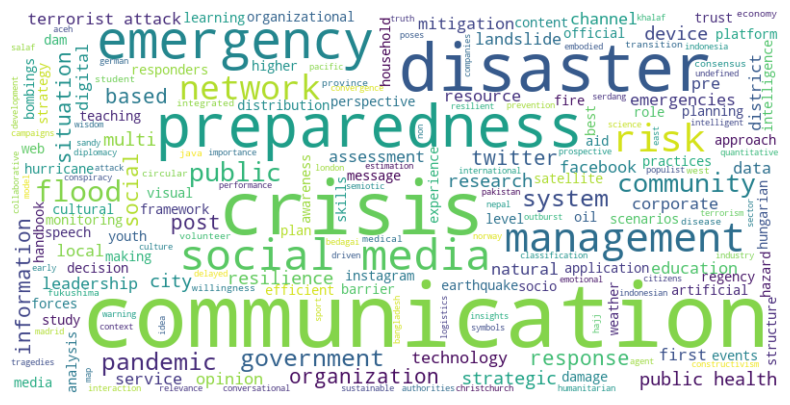

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(key_word_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [312]:
article_edge_tuple_list = []
for i in range(screened_refs_details.shape[0]):
    for j in range(i+1,screened_refs_details.shape[0]):
        a_i = [key_words['keyword'] for key_words in ast.literal_eval(screened_refs_details['keywords'].iloc[i])]
        a_j = [key_words['keyword'] for key_words in ast.literal_eval(screened_refs_details['keywords'].iloc[j])]
        common_elements = set(a_i) & set(a_j)
        if len(common_elements) >= 2:
            article_edge_tuple_list.append((i,j))
            
article_edge_tuple_list

[(0, 2),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 12),
 (0, 15),
 (0, 16),
 (0, 19),
 (0, 23),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 31),
 (0, 32),
 (0, 34),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 50),
 (0, 52),
 (0, 53),
 (0, 55),
 (0, 60),
 (0, 69),
 (0, 71),
 (0, 91),
 (0, 131),
 (0, 151),
 (0, 152),
 (0, 155),
 (0, 161),
 (0, 164),
 (0, 172),
 (0, 174),
 (0, 190),
 (0, 192),
 (2, 7),
 (2, 8),
 (2, 10),
 (2, 12),
 (2, 15),
 (2, 16),
 (2, 19),
 (2, 23),
 (2, 27),
 (2, 28),
 (2, 29),
 (2, 30),
 (2, 31),
 (2, 32),
 (2, 34),
 (2, 36),
 (2, 37),
 (2, 38),
 (2, 40),
 (2, 41),
 (2, 42),
 (2, 43),
 (2, 44),
 (2, 50),
 (2, 52),
 (2, 53),
 (2, 55),
 (2, 60),
 (2, 66),
 (2, 67),
 (2, 69),
 (2, 71),
 (2, 80),
 (2, 82),
 (2, 89),
 (2, 91),
 (2, 131),
 (2, 143),
 (2, 151),
 (2, 152),
 (2, 155),
 (2, 157),
 (2, 161),
 (2, 164),
 (2, 172),
 (2, 174),
 (2, 190),
 (2, 192),
 (3, 20),
 (3, 61),
 (3, 168),
 (4, 138),
 (6, 12),
 (6, 54),
 (7, 8),
 (7, 10),
 (7, 12),
 (

In [313]:
len(article_edge_tuple_list)

1028

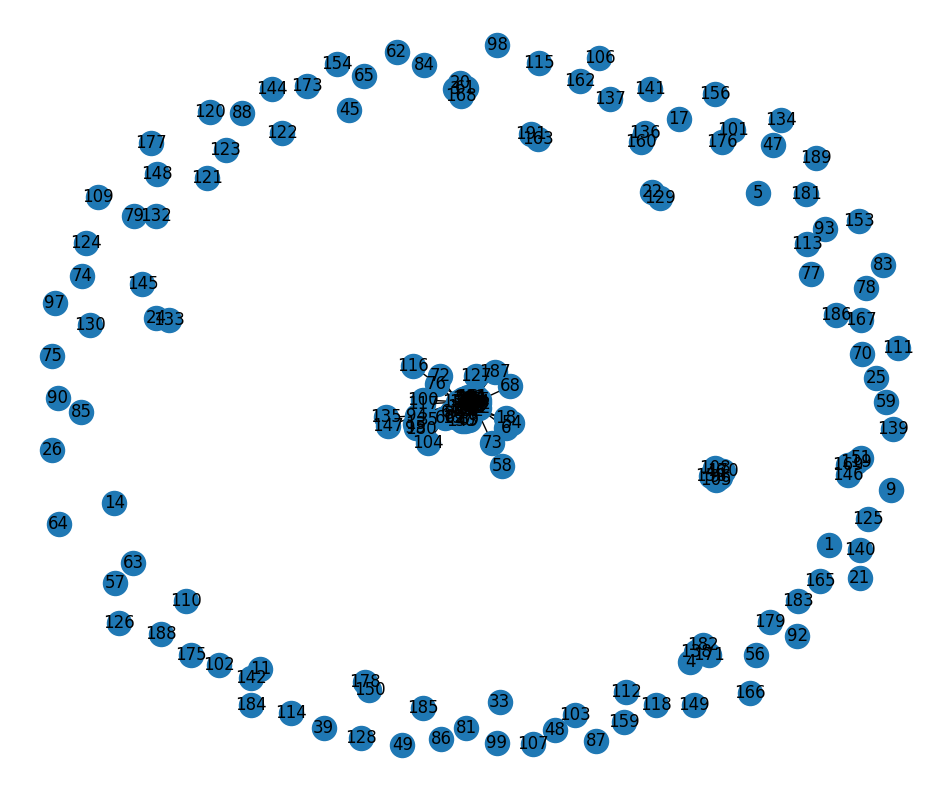

In [314]:
import networkx as nx
import matplotlib.pyplot as plt_lib

G = nx.Graph()

G.add_nodes_from(range(0,193))

fig, ax = plt_lib.subplots(figsize=(12, 10))

G.add_edges_from(article_edge_tuple_list)

nx.draw(G, with_labels=True, ax=ax)
plt_lib.show()

In [315]:
degrees = dict(G.degree())
print("Degrees of each node:", degrees)

average_degree = np.sum(np.array(list(degrees.values()))) / len(degrees)
print("Average degree of the graph:", average_degree)

Degrees of each node: {0: 41, 1: 0, 2: 49, 3: 3, 4: 1, 5: 0, 6: 2, 7: 50, 8: 41, 9: 0, 10: 49, 11: 1, 12: 43, 13: 5, 14: 0, 15: 42, 16: 41, 17: 0, 18: 1, 19: 42, 20: 3, 21: 0, 22: 1, 23: 41, 24: 1, 25: 0, 26: 0, 27: 41, 28: 41, 29: 41, 30: 12, 31: 41, 32: 49, 33: 0, 34: 42, 35: 6, 36: 41, 37: 41, 38: 42, 39: 0, 40: 41, 41: 43, 42: 41, 43: 41, 44: 41, 45: 0, 46: 5, 47: 0, 48: 0, 49: 0, 50: 41, 51: 2, 52: 50, 53: 49, 54: 2, 55: 41, 56: 0, 57: 0, 58: 1, 59: 0, 60: 41, 61: 3, 62: 0, 63: 0, 64: 0, 65: 0, 66: 20, 67: 14, 68: 1, 69: 41, 70: 0, 71: 49, 72: 1, 73: 2, 74: 0, 75: 0, 76: 3, 77: 0, 78: 0, 79: 0, 80: 14, 81: 0, 82: 14, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 12, 90: 0, 91: 41, 92: 0, 93: 0, 94: 10, 95: 5, 96: 5, 97: 0, 98: 0, 99: 0, 100: 3, 101: 1, 102: 0, 103: 0, 104: 1, 105: 5, 106: 0, 107: 0, 108: 5, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 1, 117: 3, 118: 0, 119: 2, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 0, 

In [316]:
degree_centrality_results = nx.degree_centrality(G)
print("Degree centrality measurement results: ", degree_centrality_results)

betweenness_centrality_results = nx.betweenness_centrality(G)
print("Betweenness centrality measurement results: ", betweenness_centrality_results)

load_centrality_results = nx.load_centrality(G)
print("Load Centrality measurement results", load_centrality_results)

eigenvector_centrality_results = nx.eigenvector_centrality(G)
print("Eigenvector Centrality measurement results: ", eigenvector_centrality_results)

edge_betweenness_centrality_results = nx.edge_betweenness_centrality(G)
print("Edge Betweenness Centrality measurement results: ", edge_betweenness_centrality_results)

closeness_centrality_results = nx.closeness_centrality(G)
print("Closeness centrality measurement results: ", closeness_centrality_results)

Degree centrality measurement results:  {0: 0.21354166666666666, 1: 0.0, 2: 0.2552083333333333, 3: 0.015625, 4: 0.005208333333333333, 5: 0.0, 6: 0.010416666666666666, 7: 0.26041666666666663, 8: 0.21354166666666666, 9: 0.0, 10: 0.2552083333333333, 11: 0.005208333333333333, 12: 0.22395833333333331, 13: 0.026041666666666664, 14: 0.0, 15: 0.21875, 16: 0.21354166666666666, 17: 0.0, 18: 0.005208333333333333, 19: 0.21875, 20: 0.015625, 21: 0.0, 22: 0.005208333333333333, 23: 0.21354166666666666, 24: 0.005208333333333333, 25: 0.0, 26: 0.0, 27: 0.21354166666666666, 28: 0.21354166666666666, 29: 0.21354166666666666, 30: 0.0625, 31: 0.21354166666666666, 32: 0.2552083333333333, 33: 0.0, 34: 0.21875, 35: 0.03125, 36: 0.21354166666666666, 37: 0.21354166666666666, 38: 0.21875, 39: 0.0, 40: 0.21354166666666666, 41: 0.22395833333333331, 42: 0.21354166666666666, 43: 0.21354166666666666, 44: 0.21354166666666666, 45: 0.0, 46: 0.026041666666666664, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.21354166666666666, 51: 0.01

In [317]:
density = nx.density(G)

densities = list()
i = 0

max_degree = len(G) - 1

for node in G.nodes():
    degree = G.degree(node)
    density = degree / max_degree
    densities.append([node, density])
    i += 1
    
densities = np.array(densities)

In [318]:
densities.shape

(193, 2)

In [342]:
avg_density = 0
for r in densities:
    avg_density += r[1]
avg_density /= densities.shape[0]
avg_density

0.055483592400690875

In [319]:
highest_density_node = densities[np.where(densities[:,1].astype(float) == np.max(densities[:,1].astype(float))), :][0][0][0]
print("Highet density node: ", screened_refs_details['title'].iloc[int(highest_density_node)])

smallest_density_node = densities[np.where(densities[:,1].astype(float) == np.min(densities[:,1].astype(float))), :][0][0][0]
print("Smallest density node: ", screened_refs_details['title'].iloc[int(smallest_density_node)])

Highet density node:  The Use of Social Media in Risk and Crisis Communication
Smallest density node:  COVID-19 and Future Disease X in Circular Economy Transition: Redesigning Pandemic Preparedness to Prevent a Global Disaster


In [320]:
connected_components = list(nx.connected_components(G))

print("Connected components:", connected_components)

Connected components: [{0, 2, 131, 6, 7, 8, 135, 10, 12, 13, 15, 16, 143, 18, 19, 147, 157, 23, 151, 152, 155, 27, 29, 28, 31, 32, 161, 34, 30, 36, 37, 38, 164, 40, 41, 42, 43, 44, 172, 174, 35, 50, 52, 53, 54, 55, 180, 58, 187, 60, 190, 192, 66, 67, 68, 69, 71, 72, 73, 76, 80, 82, 89, 91, 94, 95, 100, 104, 116, 117, 127}, {1}, {168, 3, 20, 61}, {138, 171, 4, 182}, {5}, {9}, {11, 142}, {14}, {17}, {21}, {129, 22}, {24, 133}, {25}, {26}, {33}, {39}, {45}, {96, 105, 170, 108, 46, 158}, {47}, {48}, {49}, {169, 146, 51, 119}, {56}, {57}, {59}, {62}, {63}, {64}, {65}, {70}, {74}, {75}, {77}, {78}, {79}, {81}, {83}, {84}, {85}, {86}, {87}, {88}, {90}, {92}, {93}, {97}, {98}, {99}, {176, 101}, {102}, {103}, {106}, {107}, {109}, {110}, {111}, {112}, {113}, {114}, {115}, {118}, {120}, {121}, {122}, {123}, {124}, {125}, {126}, {128}, {130}, {132}, {134}, {136, 160}, {137}, {139}, {140}, {141}, {144}, {145}, {148}, {149}, {178, 150}, {153}, {154}, {156}, {159}, {162}, {163, 191}, {165}, {166}, {1

In [321]:
len(connected_components[0])

71

In [322]:
pos = nx.spring_layout(G, k=None, iterations=50)

In [323]:
pos

{0: array([-0.02720964, -0.00944739]),
 1: array([0.73706138, 0.44351029]),
 2: array([-0.00393186, -0.00917086]),
 3: array([-0.67774102, -0.70731512]),
 4: array([0.7079799 , 0.24016151]),
 5: array([0.81473433, 0.38138105]),
 6: array([-0.11568943, -0.03074875]),
 7: array([-0.00830192,  0.01037551]),
 8: array([-0.01895407,  0.00772214]),
 9: array([0.15908981, 0.93328661]),
 10: array([ 0.00172249, -0.00117273]),
 11: array([ 0.07484444, -1.        ]),
 12: array([-0.03966874, -0.01131374]),
 13: array([ 0.05156477, -0.10265905]),
 14: array([ 0.55406742, -0.80182609]),
 15: array([-0.01904942,  0.02032101]),
 16: array([-0.0328411 ,  0.01225141]),
 17: array([-0.91354063, -0.20146155]),
 18: array([-0.02159271,  0.08725112]),
 19: array([-0.01616207, -0.01812712]),
 20: array([-0.67427912, -0.68997874]),
 21: array([-0.95820374, -0.242795  ]),
 22: array([ 0.13382463, -0.86700058]),
 23: array([-0.03324311, -0.00330089]),
 24: array([-0.90288173, -0.42017373]),
 25: array([-0.204

(-0.22889426944704377,
 0.13080397940882924,
 -0.2110237442244998,
 0.13383101146497364)

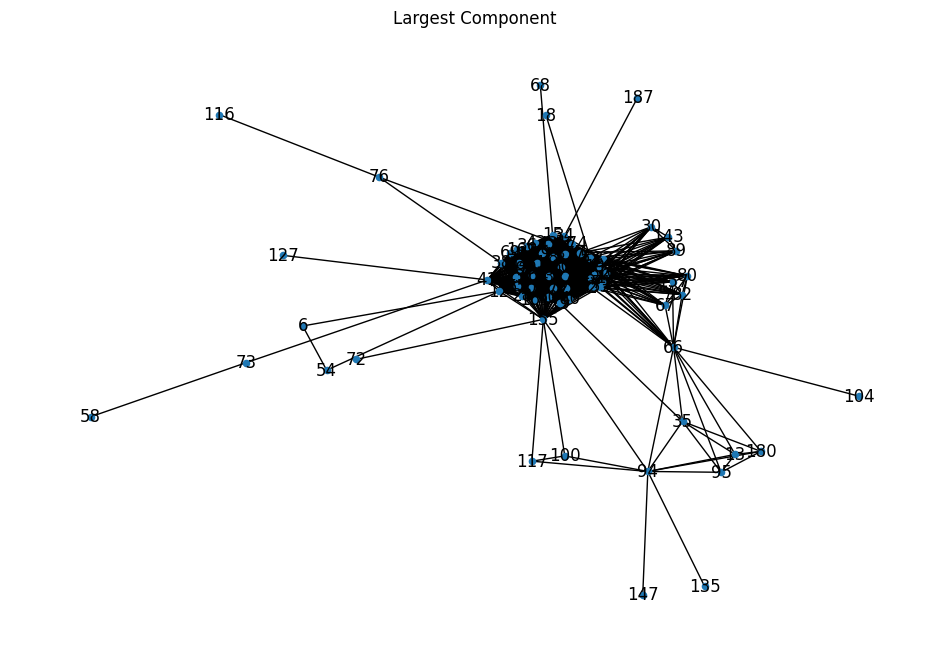

In [324]:
plt_lib.figure(figsize=(12, 8))
nx.draw_networkx(G.subgraph(connected_components[0]), pos, node_size=20)
plt_lib.title("Largest Component")
plt_lib.axis('off')

In [332]:
large_connected_compenent_df = screened_refs_details.iloc[list(connected_components[0])]

In [334]:
list(large_connected_compenent_df['title'])

['The Handbook of Crisis Communication',
 'Social Media as Amedium of Crisis Communication Amongst University Campuses in Kisii County',
 'Communication in Crisis. The "Red Phone" and the "Hotline"',
 'The Spread of COVID-19 Crisis Communication by German Public Authorities and Experts on Twitter: Quantitative Content Analysis (Preprint)',
 'The Use of Social Media in Risk and Crisis Communication',
 'Crisis communication and COVID-19: Covering two Pacific tragedies with storytelling',
 'Emergency Management and Communication Improvements',
 'Crisis Communication Patterns in Social Media during Hurricane Sandy',
 'Crisis communication on Twitter',
 'THE IMPORTANCE OF COMMUNICATION IN AN EMERGENCY',
 'The Handbook of International Crisis Communication Research',
 'Implementation Communication Crisis Public Relations of Digital Media-Based: Internet Use Before, During, and After the Covid19 Crisis',
 'Association Between Public Opinion and Malaysian Government Communication Strategies Ab

## Publication date

In [5]:
screened_refs_details['publication_data'] = pd.to_datetime(screened_refs_details['publication_data'])

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\4112452234.py:1: UserWarning: Parsing '19-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  screened_refs_details['publication_data'] = pd.to_datetime(screened_refs_details['publication_data'])
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\4112452234.py:1: UserWarning: Parsing '28-06-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  screened_refs_details['publication_data'] = pd.to_datetime(screened_refs_details['publication_data'])
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\4112452234.py:1: UserWarning: Parsing '17-12-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  screened_refs_details['publication_data'] = pd.to_datetime(screened_refs_details['publication_data'])
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\4112452234.py:1: U

In [6]:
publication_year_dict = {}
for timestamp in screened_refs_details['publication_data']:
    if timestamp.year in publication_year_dict:
        publication_year_dict[timestamp.year] += 1
    else:
        publication_year_dict[timestamp.year] = 1

<BarContainer object of 21 artists>

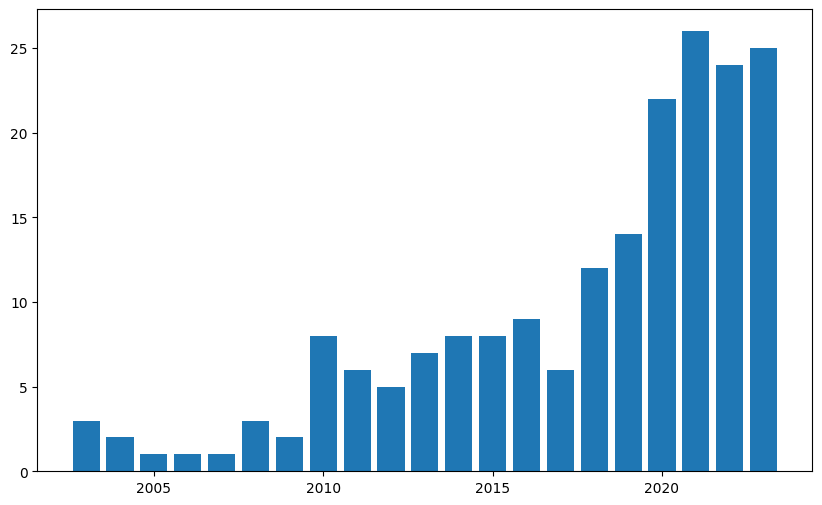

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(publication_year_dict.keys(), publication_year_dict.values())

In [8]:
keyword_date_df = screened_refs_details[['publication_data','keywords']]

year_list = []
for timestamp in keyword_date_df['publication_data']:
    year_list.append(timestamp.year)
    
keyword_date_df['year'] = year_list

key_word_list = []
for key_words in screened_refs_details['keywords']:
    temp_list =[]
    try: 
        key_words = ast.literal_eval(key_words)
        for kw in key_words:
            temp_list.append(kw['keyword'])
    except:
        continue
    key_word_list.append(temp_list)
    
keyword_date_df['keywords'] = key_word_list

keyword_date_df.head()

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\1115842801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_date_df['year'] = year_list
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_5756\1115842801.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_date_df['keywords'] = key_word_list


publication_data                                           keywords  year
0       2010-01-19                  [crisis, communication, handbook]  2010
1       2021-06-28  [pandemic preparedness, circular economy trans...  2021
2       2021-01-05              [social media, crisis, communication]  2021
3       2021-01-05  [medical student willingness, pandemics, volun...  2021
4       2018-01-04  [preparedness level, west java province, disas...  2018

In [11]:
key_word_list

[['crisis', 'communication', 'handbook'],
 ['pandemic preparedness',
  'circular economy transition',
  'disease',
  'disaster'],
 ['social media', 'crisis', 'communication'],
 ['medical student willingness',
  'pandemics',
  'volunteer',
  'preparedness',
  'disasters'],
 ['preparedness level', 'west java province', 'disaster', 'community'],
 ['integrated flood management',
  'flood pre-disaster',
  'preparedness',
  'fukushima',
  'consensus-making'],
 ['twitter',
  'quantitative content analysis',
  'crisis',
  'german public authorities'],
 ['social media', 'crisis', 'risk', 'communication'],
 ['pacific tragedies', 'crisis', 'communication'],
 ['resilient', 'communication', 'device-to-device'],
 ['social media', 'hurricane sandy', 'crisis', 'communication'],
 ['natural disasters', 'damage mitigation', 'preparedness', 'citizens'],
 ['twitter', 'crisis', 'communication'],
 ['communication', 'emergency', 'importance'],
 ['flood disaster prevention',
  'local government organizations',

In [13]:
flat_list = [item for sublist in key_word_list for item in sublist]
Counter(flat_list)

Counter({'crisis': 68,
         'communication': 86,
         'handbook': 2,
         'pandemic preparedness': 1,
         'circular economy transition': 1,
         'disease': 1,
         'disaster': 32,
         'social media': 19,
         'medical student willingness': 1,
         'pandemics': 1,
         'volunteer': 1,
         'preparedness': 40,
         'disasters': 4,
         'preparedness level': 1,
         'west java province': 1,
         'community': 2,
         'integrated flood management': 1,
         'flood pre-disaster': 1,
         'fukushima': 1,
         'consensus-making': 1,
         'twitter': 3,
         'quantitative content analysis': 1,
         'german public authorities': 1,
         'risk': 10,
         'pacific tragedies': 1,
         'resilient': 1,
         'device-to-device': 1,
         'hurricane sandy': 1,
         'natural disasters': 2,
         'damage mitigation': 1,
         'citizens': 1,
         'emergency': 17,
         'importance': 1,

In [14]:
sorted(dict(Counter(flat_list)).items(), key=lambda item: item[1], reverse=True)[:15]

[('communication', 86),
 ('crisis', 68),
 ('preparedness', 40),
 ('disaster', 32),
 ('social media', 19),
 ('emergency', 17),
 ('risk', 10),
 ('management', 6),
 ('disasters', 4),
 ('pandemic', 4),
 ('flood', 4),
 ('twitter', 3),
 ('disaster communication', 3),
 ('crisis management', 3),
 ('network', 3)]

In [15]:
keyword_date_df['year'].unique()

array([2010, 2021, 2018, 2013, 2020, 2022, 2016, 2014, 2019, 2023, 2009,
       2006, 2015, 2008, 2011, 2012, 2017, 2003, 2005, 2007, 2004],
      dtype=int64)

In [34]:
key_year_dict = {}
for key_word,_ in sorted(dict(Counter(flat_list)).items(), key=lambda item: item[1], reverse=True)[:50]:
    temp_list = []
    for year in list(keyword_date_df['year'].unique()):
        count = 0
        temp_df = keyword_date_df[keyword_date_df['year']==year]
        for i in range(temp_df.shape[0]):
            if key_word in list(temp_df['keywords'].iloc[i]):
                count += 1
        temp_list.append((year,count))
    key_year_dict[key_word] = temp_list
    
key_year_dict

{'communication': [(2010, 5),
  (2021, 6),
  (2018, 7),
  (2013, 6),
  (2020, 8),
  (2022, 13),
  (2016, 4),
  (2014, 7),
  (2019, 3),
  (2023, 8),
  (2009, 2),
  (2006, 1),
  (2015, 6),
  (2008, 0),
  (2011, 2),
  (2012, 1),
  (2017, 3),
  (2003, 1),
  (2005, 0),
  (2007, 1),
  (2004, 2)],
 'crisis': [(2010, 5),
  (2021, 8),
  (2018, 4),
  (2013, 3),
  (2020, 3),
  (2022, 13),
  (2016, 4),
  (2014, 3),
  (2019, 7),
  (2023, 11),
  (2009, 1),
  (2006, 1),
  (2015, 3),
  (2008, 0),
  (2011, 0),
  (2012, 1),
  (2017, 0),
  (2003, 1),
  (2005, 0),
  (2007, 0),
  (2004, 0)],
 'preparedness': [(2010, 1),
  (2021, 7),
  (2018, 3),
  (2013, 0),
  (2020, 4),
  (2022, 4),
  (2016, 2),
  (2014, 0),
  (2019, 4),
  (2023, 9),
  (2009, 0),
  (2006, 0),
  (2015, 0),
  (2008, 2),
  (2011, 2),
  (2012, 0),
  (2017, 1),
  (2003, 0),
  (2005, 1),
  (2007, 0),
  (2004, 0)],
 'disaster': [(2010, 0),
  (2021, 7),
  (2018, 1),
  (2013, 0),
  (2020, 6),
  (2022, 2),
  (2016, 2),
  (2014, 0),
  (2019, 4),
  (

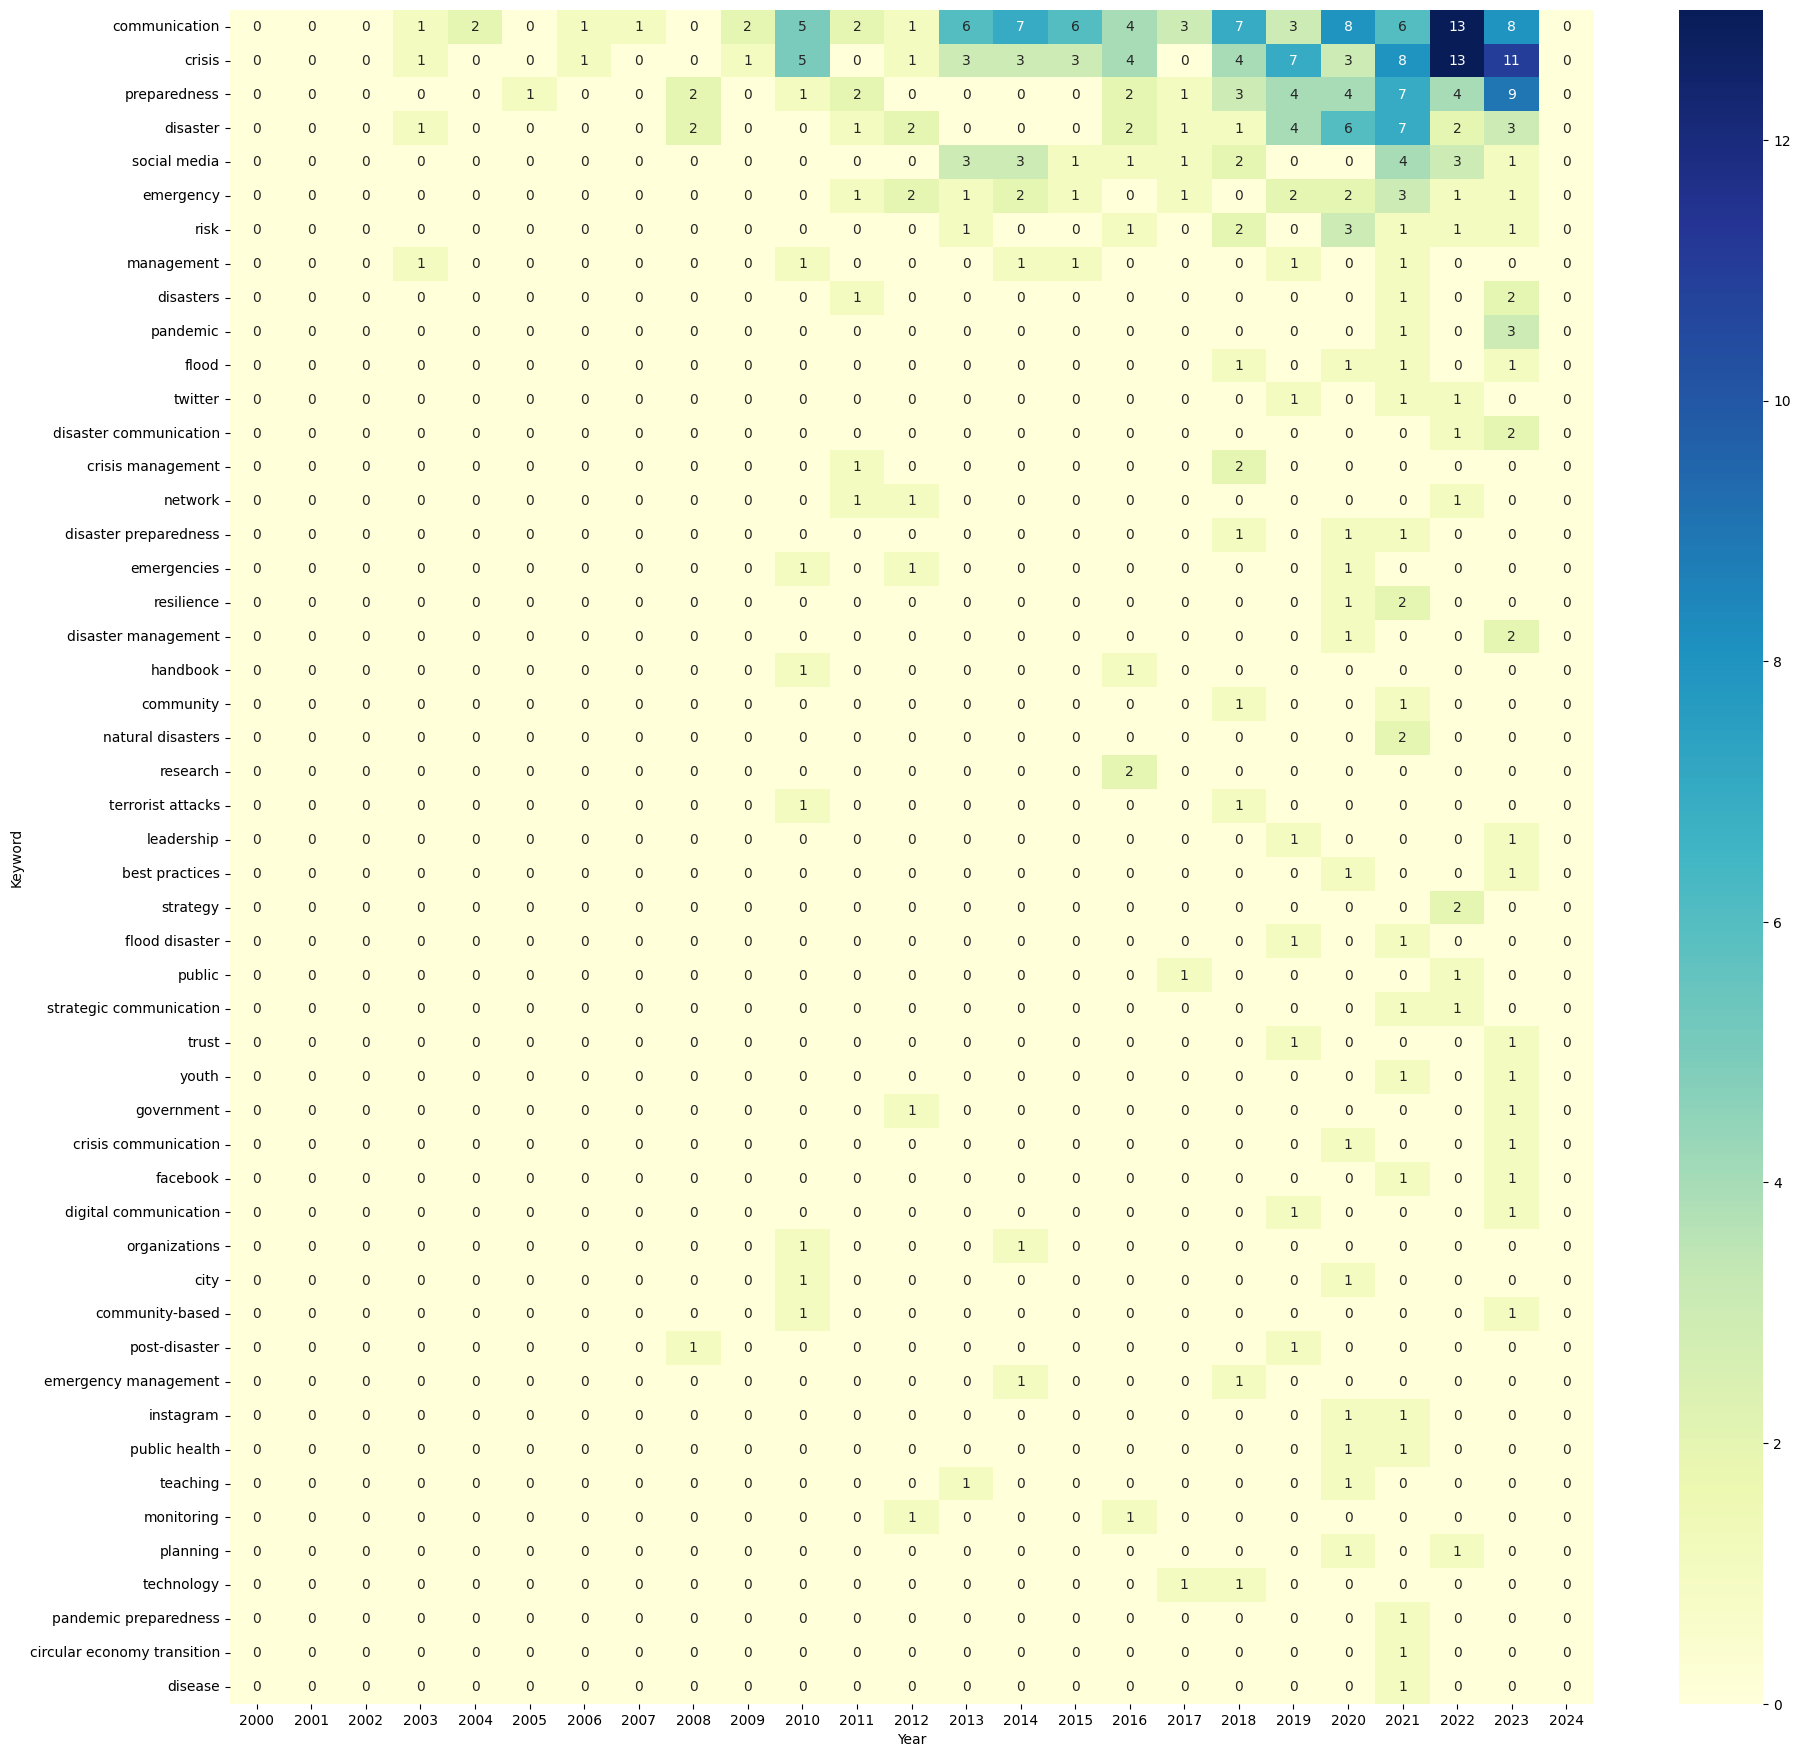

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = key_year_dict

structured_data = {year: {} for year in range(2000, 2025)}

for keyword, values in data.items():
    for year, count in values:
        structured_data[year][keyword] = count

df = pd.DataFrame(structured_data).T

df.fillna(0, inplace=True)

plt.figure(figsize=(22, 22))
sns.heatmap(df.T, cmap="YlGnBu", annot=True, fmt="g")

plt.xlabel('Year')
plt.ylabel('Keyword')

plt.show()

In [5]:
screened_refs_details.head()

doi  \
0           https://doi.org/10.1002/9781444314885   
1      https://doi.org/10.1007/s43615-021-00060-x   
2              https://doi.org/10.7176/nmmc/96-05   
3         https://doi.org/10.1093/bjs/znab134.185   
4  https://doi.org/10.1088/1755-1315/145/1/012103   

                                ids      category  \
0   https://openalex.org/W268257668         other   
1  https://openalex.org/W3173683644  preparedness   
2  https://openalex.org/W4249864866      response   
3  https://openalex.org/W3162876202  preparedness   
4  https://openalex.org/W2801985200      recovery   

                                               title publication_data  \
0               The Handbook of Crisis Communication       2010-01-19   
1  COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
2  Social Media as Amedium of Crisis Communicatio...       2021-01-05   
3  986 A Systematic Review of Medical Student Wil...       2021-01-05   
4  The Preparedness Level of Community in Facing ...       2018-01-04   

  language                              journal  \
0       en                         Wiley eBooks   
1       en  Circular Economy and Sustainability   
2       en     New Media and Mass Communication   
3       en           British Journal of Surgery   
4       en                IOP conference series   

                                             authors  \
0  [{'author_position': 'first', 'author': {'id':...   
1  [{'author_position': 'first', 'author': {'id':...   
2                                                 []   
3  [{'author_position': 'first', 'author': {'id':...   
4  [{'author_position': 'first', 'author': {'id':...   

                                            keywords  \
0  [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
1  [{'keyword': 'pandemic preparedness', 'score':...   
2  [{'keyword': 'social media', 'score': 0.5196},...   
3  [{'keyword': 'medical student willingness', 's...   
4  [{'keyword': 'preparedness level', 'score': 0....   

                                            concepts  \
0  [{'id': 'https://openalex.org/C2776058685', 'w...   
1  [{'id': 'https://openalex.org/C89623803', 'wik...   
2  [{'id': 'https://openalex.org/C518677369', 'wi...   
3  [{'id': 'https://openalex.org/C2777042776', 'w...   
4  [{'id': 'https://openalex.org/C2777042776', 'w...   

                                            abstract  citation  
0                                                NaN     423.0  
1  The COVID-19 pandemic exposed a world surprisi...       6.0  
2  Social media gives the ability to communicate ...       0.0  
3  Abstract Introduction We aimed to identify mot...       4.0  
4  Preparedness in facing disaster becomes a must...       6.0

In [8]:
screened_refs_details['publication_data'] = pd.to_datetime(screened_refs_details['publication_data'])

In [11]:
concept_date_df = pd.DataFrame()

concept_date_df = screened_refs_details[['publication_data','concepts']]

year_list = []
for timestamp in concept_date_df['publication_data']:
    year_list.append(timestamp.year)
    
concept_date_df['year'] = year_list

concept_list = []
for concept in screened_refs_details['concepts']:
    temp_list =[]
    try: 
        concept = ast.literal_eval(concept)
        for c in concept:
            temp_list.append(c['display_name'])
    except:
        continue
    concept_list.append(temp_list)
    
concept_date_df['concepts'] = concept_list

concept_date_df.head()

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_20188\1953129937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concept_date_df['year'] = year_list
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_20188\1953129937.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concept_date_df['concepts'] = concept_list


publication_data                                           concepts  year
0       2010-01-19  [Crisis communication, Computer science, Polit...  2010
1       2021-06-28  [Pandemic, Preparedness, Public health, Global...  2021
2       2021-01-05  [Social media, Popularity, Crisis communicatio...  2021
3       2021-01-05  [Preparedness, Curriculum, Pandemic, Medicine,...  2021
4       2018-01-04  [Preparedness, Disaster preparedness, Landslid...  2018

In [12]:
flat_list = [item for sublist in concept_list for item in sublist]
Counter(flat_list)

Counter({'Crisis communication': 69,
         'Computer science': 121,
         'Political science': 175,
         'Public relations': 97,
         'Pandemic': 8,
         'Preparedness': 71,
         'Public health': 4,
         'Global health': 1,
         'Population': 8,
         'Development economics': 3,
         'International Health Regulations': 1,
         'Economic growth': 16,
         'Business': 95,
         'Infectious disease (medical specialty)': 11,
         'Disease': 11,
         'Environmental health': 6,
         'Geography': 68,
         'Coronavirus disease 2019 (COVID-19)': 10,
         'Medicine': 24,
         'Economics': 32,
         'Nursing': 7,
         'Pathology': 13,
         'Law': 151,
         'Social media': 44,
         'Popularity': 2,
         'Software portability': 1,
         'Digital media': 2,
         'New media': 1,
         'Advertising': 9,
         'Internet privacy': 12,
         'Sociology': 53,
         'World Wide Web': 32,
      

In [13]:
concept_year_dict = {}
for concept,_ in sorted(dict(Counter(flat_list)).items(), key=lambda item: item[1], reverse=True)[:50]:
    temp_list = []
    for year in list(concept_date_df['year'].unique()):
        count = 0
        temp_df = concept_date_df[concept_date_df['year']==year]
        for i in range(temp_df.shape[0]):
            if concept in list(temp_df['concepts'].iloc[i]):
                count += 1
        temp_list.append((year,count))
    concept_year_dict[concept] = temp_list
    
concept_year_dict

{'Political science': [(2010, 8),
  (2021, 23),
  (2018, 10),
  (2013, 7),
  (2020, 21),
  (2022, 21),
  (2016, 9),
  (2014, 7),
  (2019, 11),
  (2023, 23),
  (2009, 2),
  (2006, 0),
  (2015, 6),
  (2008, 3),
  (2011, 6),
  (2012, 5),
  (2017, 6),
  (2003, 3),
  (2005, 1),
  (2007, 1),
  (2004, 2)],
 'Law': [(2010, 5),
  (2021, 22),
  (2018, 9),
  (2013, 7),
  (2020, 19),
  (2022, 16),
  (2016, 6),
  (2014, 5),
  (2019, 10),
  (2023, 22),
  (2009, 1),
  (2006, 0),
  (2015, 4),
  (2008, 3),
  (2011, 6),
  (2012, 4),
  (2017, 6),
  (2003, 2),
  (2005, 1),
  (2007, 1),
  (2004, 2)],
 'Computer science': [(2010, 4),
  (2021, 14),
  (2018, 8),
  (2013, 5),
  (2020, 14),
  (2022, 18),
  (2016, 6),
  (2014, 5),
  (2019, 8),
  (2023, 10),
  (2009, 1),
  (2006, 1),
  (2015, 5),
  (2008, 0),
  (2011, 6),
  (2012, 5),
  (2017, 6),
  (2003, 2),
  (2005, 0),
  (2007, 1),
  (2004, 2)],
 'Public relations': [(2010, 4),
  (2021, 12),
  (2018, 5),
  (2013, 4),
  (2020, 10),
  (2022, 16),
  (2016, 8),
 

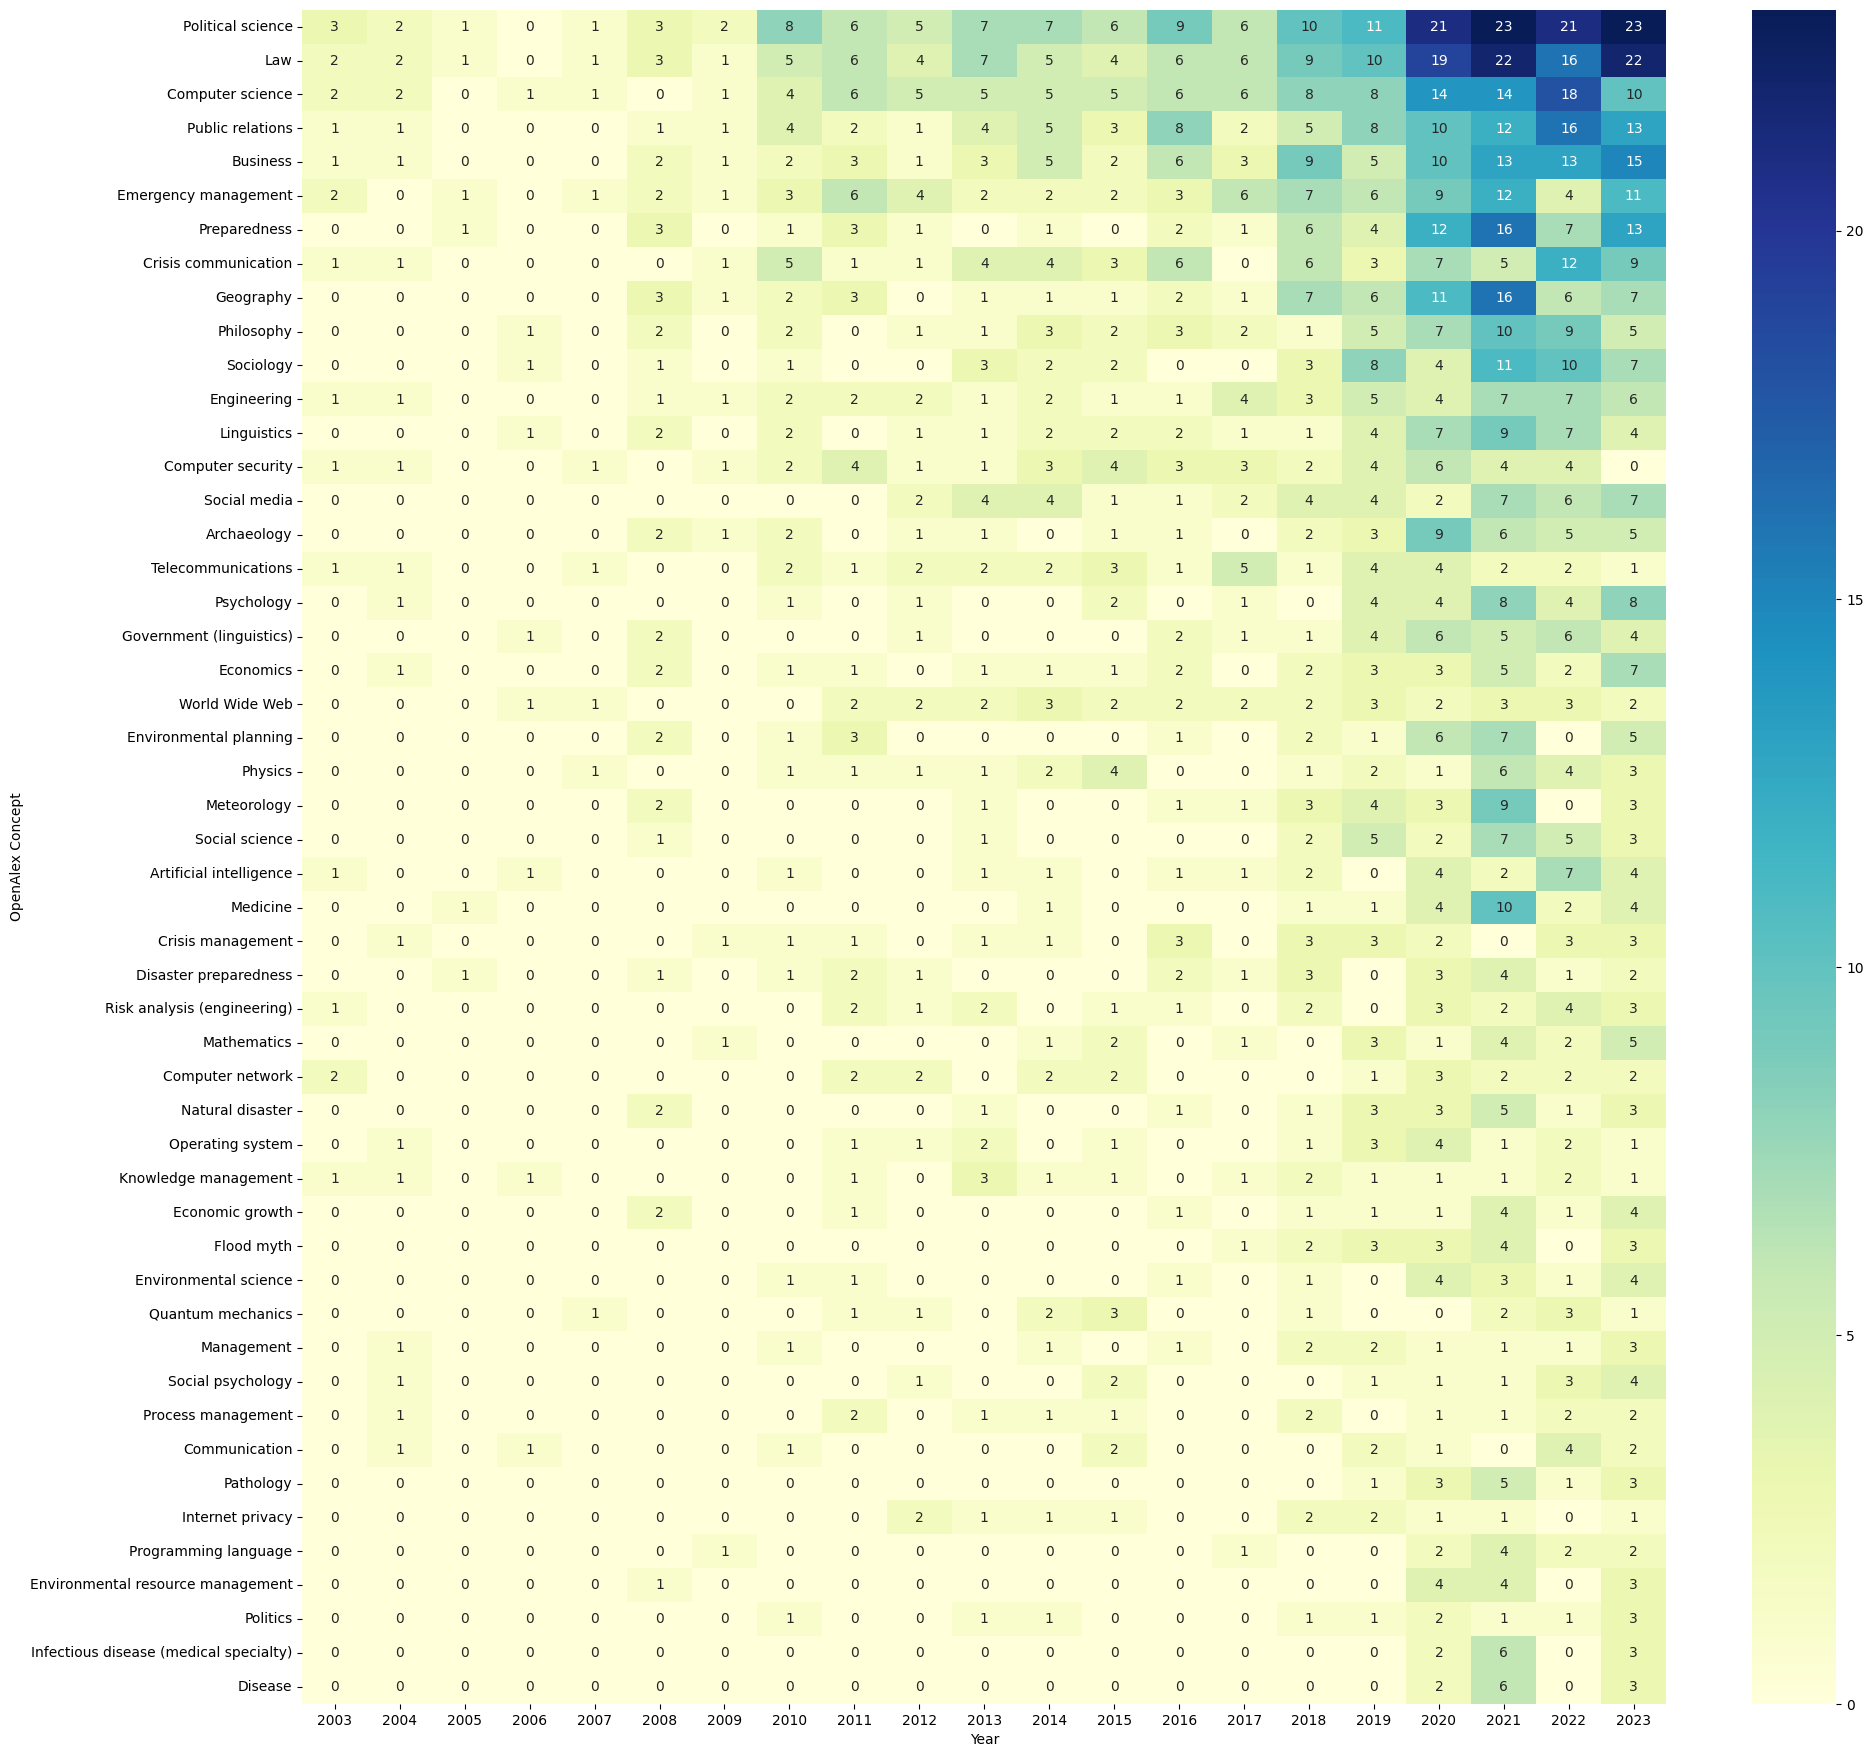

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = concept_year_dict

structured_data = {year: {} for year in range(2003, 2024)}

for concept, values in data.items():
    for year, count in values:
        structured_data[year][concept] = count

df = pd.DataFrame(structured_data).T

df.fillna(0, inplace=True)

plt.figure(figsize=(22, 22))
sns.heatmap(df.T, cmap="YlGnBu", annot=True, fmt="g")

plt.xlabel('Year')
plt.ylabel('OpenAlex Concept')
#plt.title('Keyword heatmap from 2000 to 2024')
plt.show()

## Journal bar graph

In [347]:
screened_refs_details.head()

doi  \
1            https://doi.org/10.1002/9781444314885   
9       https://doi.org/10.1007/s43615-021-00060-x   
10              https://doi.org/10.7176/nmmc/96-05   
14         https://doi.org/10.1093/bjs/znab134.185   
19  https://doi.org/10.1088/1755-1315/145/1/012103   

                                 ids  \
1    https://openalex.org/W268257668   
9   https://openalex.org/W3173683644   
10  https://openalex.org/W4249864866   
14  https://openalex.org/W3162876202   
19  https://openalex.org/W2801985200   

                                                title publication_data  \
1                The Handbook of Crisis Communication       2010-01-19   
9   COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
10  Social Media as Amedium of Crisis Communicatio...       2021-01-05   
14  986 A Systematic Review of Medical Student Wil...       2021-01-05   
19  The Preparedness Level of Community in Facing ...       2018-01-04   

   language                              journal  \
1        en                         Wiley eBooks   
9        en  Circular Economy and Sustainability   
10       en     New Media and Mass Communication   
14       en           British Journal of Surgery   
19       en                IOP conference series   

                                              authors  \
1   [{'author_position': 'first', 'author': {'id':...   
9   [{'author_position': 'first', 'author': {'id':...   
10                                                 []   
14  [{'author_position': 'first', 'author': {'id':...   
19  [{'author_position': 'first', 'author': {'id':...   

                                             keywords  \
1   [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
9   [{'keyword': 'pandemic preparedness', 'score':...   
10  [{'keyword': 'social media', 'score': 0.5196},...   
14  [{'keyword': 'medical student willingness', 's...   
19  [{'keyword': 'preparedness level', 'score': 0....   

                                             concepts  \
1   [{'id': 'https://openalex.org/C2776058685', 'w...   
9   [{'id': 'https://openalex.org/C89623803', 'wik...   
10  [{'id': 'https://openalex.org/C518677369', 'wi...   
14  [{'id': 'https://openalex.org/C2777042776', 'w...   
19  [{'id': 'https://openalex.org/C2777042776', 'w...   

                                             abstract  
1                                                 NaN  
9   The COVID-19 pandemic exposed a world surprisi...  
10  Social media gives the ability to communicate ...  
14  Abstract Introduction We aimed to identify mot...  
19  Preparedness in facing disaster becomes a must...

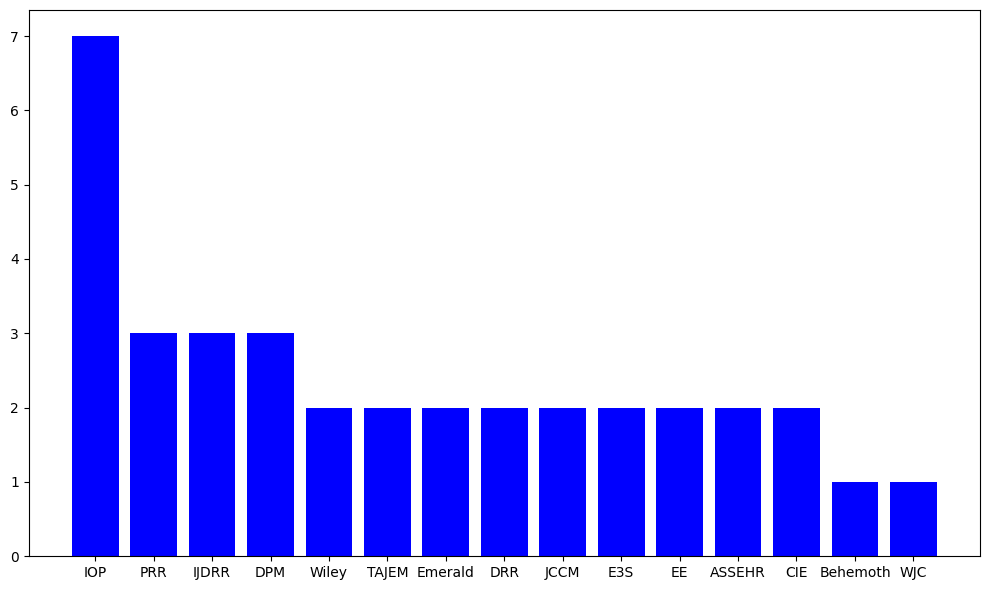

In [56]:
keys = ['IOP','PRR','IJDRR','DPM','Wiley','TAJEM','Emerald','DRR','JCCM','E3S','EE','ASSEHR','CIE','Behemoth','WJC']

#keys = list(dict(screened_refs_details['journal'].value_counts()).keys())[:15]
values = list(dict(screened_refs_details['journal'].value_counts()).values())[:15]

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='blue')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [335]:
screened_refs_details.to_csv('screened_refs.csv',index=False)

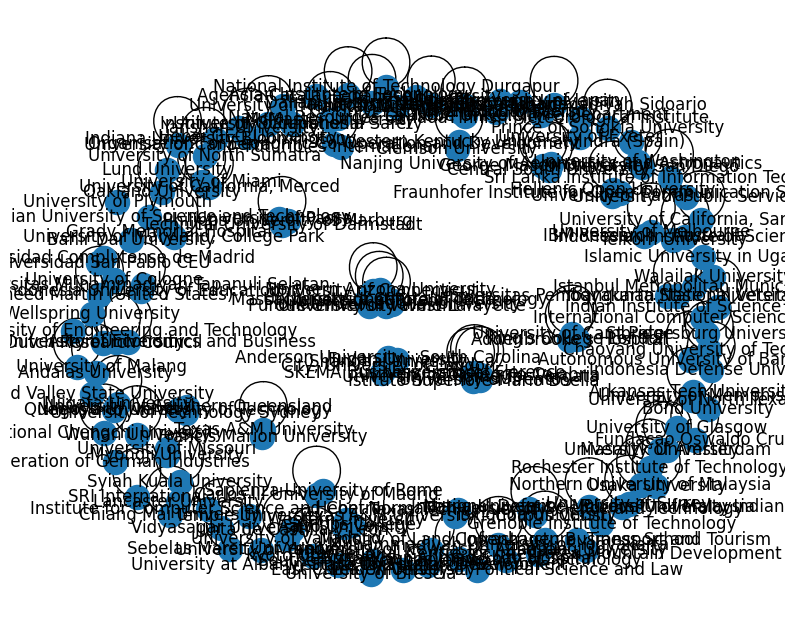

In [63]:
import networkx as nx
import matplotlib.pyplot as plt_lib

G = nx.Graph()

node_list = list(institution_dict.keys())

G.add_nodes_from(node_list)

fig, ax = plt_lib.subplots(figsize=(10, 8))

G.add_edges_from(list(dict_edge_tuple_list.keys()))

nx.draw(G, with_labels=True, ax=ax)
plt_lib.show()

In [64]:
degrees = dict(G.degree())
print("Degrees of each node:", degrees)

average_degree = sum(degrees.values()) / len(degrees)
print("Average degree of the graph:", average_degree)

Degrees of each node: {'Fundação Oswaldo Cruz': 2, "Addenbrooke's Hospital": 4, 'University of Cambridge': 4, "King's College London": 2, 'Indonesia University of Education': 3, 'Ministry of Land, Infrastructure, Transport and Tourism': 2, 'Futuribles International': 1, 'Organisation For Economic Co-Operation and Development': 3, 'Technical University of Darmstadt': 4, 'University of Passau': 2, 'Philipps University of Marburg': 2, 'Florida International University': 3, 'University of Central Florida': 9, 'Purdue University West Lafayette': 5, 'Massachusetts Institute of Technology': 3, 'Bournemouth University': 1, 'The Open University of Japan': 1, 'Istanbul Metropolitan Municipality': 0, 'Institute of Occupational Safety': 0, 'Lund University': 0, 'Universidad Complutense de Madrid': 1, 'Universidad San Pablo CEU': 1, 'University of Maryland, College Park': 3, 'Vienna University of Economics and Business': 3, 'Aston University': 4, 'State University of Malang': 2, 'St Petersburg Univ

In [65]:
# Degree Centrality 
## definition: The degree centrality for a node v is the fraction of nodes it is connected to.
degree_centrality_results = nx.degree_centrality(G)
print("Degree centrality measurement results: ", degree_centrality_results)

# Betweenness Centrality
## definition: Compute the shortest-path betweenness centrality for nodes.
betweenness_centrality_results = nx.betweenness_centrality(G)
print("Betweenness centrality measurement results: ", betweenness_centrality_results)

# Load Centrality
## definition: The load centrality of a node is the fraction of all shortest paths that pass through that node.
load_centrality_results = nx.load_centrality(G)
print("Load Centrality measurement results", load_centrality_results)

# Eigenvector Centrality
## Concept: Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 
eigenvector_centrality_results = nx.eigenvector_centrality(G)
print("Eigenvector Centrality measurement results: ", eigenvector_centrality_results)

# Edge Betweenness Centrality
## Definition: Compute betweenness centrality for edges.
edge_betweenness_centrality_results = nx.edge_betweenness_centrality(G)
print("Edge Betweenness Centrality measurement results: ", edge_betweenness_centrality_results)

Degree centrality measurement results:  {'Fundação Oswaldo Cruz': 0.011976047904191617, "Addenbrooke's Hospital": 0.023952095808383235, 'University of Cambridge': 0.023952095808383235, "King's College London": 0.011976047904191617, 'Indonesia University of Education': 0.017964071856287428, 'Ministry of Land, Infrastructure, Transport and Tourism': 0.011976047904191617, 'Futuribles International': 0.005988023952095809, 'Organisation For Economic Co-Operation and Development': 0.017964071856287428, 'Technical University of Darmstadt': 0.023952095808383235, 'University of Passau': 0.011976047904191617, 'Philipps University of Marburg': 0.011976047904191617, 'Florida International University': 0.017964071856287428, 'University of Central Florida': 0.05389221556886228, 'Purdue University West Lafayette': 0.029940119760479042, 'Massachusetts Institute of Technology': 0.017964071856287428, 'Bournemouth University': 0.005988023952095809, 'The Open University of Japan': 0.005988023952095809, 'I

In [69]:
density = nx.density(G)

densities = list()
i = 0

max_degree = len(G) - 1

for node in G.nodes():
    degree = G.degree(node)
    density = degree / max_degree
    densities.append([node, density])
    i += 1
    
densities = np.array(densities)

In [86]:
# displaying the node with the highest density value
highest_density_node = densities[np.where(densities[:,1].astype(float) == np.max(densities[:,1].astype(float))), :][0][0][0]
print("Highet density node: ", highest_density_node)

# displaying the node with the smallest density value
smallest_density_node = densities[np.where(densities[:,1].astype(float) == np.min(densities[:,1].astype(float))), :][0][0][0]
print("Smallest density node: ", smallest_density_node)

Highet density node:  University of Central Florida
Smallest density node:  Istanbul Metropolitan Municipality


In [445]:
complete_df = pd.read_csv('../open_alex_complete_data.csv')
complete_df.head()

doi  \
0   https://doi.org/10.1057/palgrave.crr.1550049   
1  https://doi.org/10.1016/s0363-8111(97)90023-0   
2   https://doi.org/10.1207/s1532754xjprr0804_04   
3      https://doi.org/10.1080/00909880600769944   
4       https://doi.org/10.1177/0021943604265607   

                                ids  \
0  https://openalex.org/W1998511687   
1  https://openalex.org/W2019894798   
2  https://openalex.org/W2038443585   
3  https://openalex.org/W2082289330   
4  https://openalex.org/W2152770871   

                                               title publication_data  \
0  Protecting Organization Reputations During a C...       2007-09-01   
1    Image repair discourse and crisis communication       1997-06-01   
2  Communication and Attributions in a Crisis: An...       1996-10-01   
3  Best Practices in Crisis Communication: An Exp...       2006-08-01   
4  Impact of Past Crises on Current Crisis Commun...       2004-07-01   

  language                                    journal  \
0       en                Corporate Reputation Review   
1       en                    Public Relations Review   
2       en       Journal of Public Relations Research   
3       en  Journal of Applied Communication Research   
4       en          Journal of Business Communication   

                                             authors  \
0  [{'author_position': 'first', 'author': {'id':...   
1  [{'author_position': 'first', 'author': {'id':...   
2  [{'author_position': 'first', 'author': {'id':...   
3  [{'author_position': 'first', 'author': {'id':...   
4  [{'author_position': 'first', 'author': {'id':...   

                                            keywords  \
0  [{'keyword': 'organization reputations', 'scor...   
1  [{'keyword': 'crisis', 'score': 0.5003}, {'key...   
2  [{'keyword': 'communication', 'score': 0.5698}...   
3  [{'keyword': 'crisis communication', 'score': ...   
4  [{'keyword': 'situational crisis communication...   

                                            concepts  
0  [{'id': 'https://openalex.org/C2776058685', 'w...  
1  [{'id': 'https://openalex.org/C2776058685', 'w...  
2  [{'id': 'https://openalex.org/C143299363', 'wi...  
3  [{'id': 'https://openalex.org/C2776058685', 'w...  
4  [{'id': 'https://openalex.org/C2776058685', 'w...

In [446]:
institution_dict = {}

for record in complete_df['authors']:
    temp_set = set()
    record = ast.literal_eval(record)
    for author in record:
        try:
            temp_set.add(author['institutions'][0]['display_name'])
        except:
            continue
    for ins in list(temp_set):
        if ins in institution_dict:
            institution_dict[ins] += 1
        else:
            institution_dict[ins] = 1
            
institution_dict

{'Eastern Illinois University': 20,
 'University of Würzburg': 1,
 'Making View (Norway)': 20,
 'City University of Hong Kong': 5,
 'Scholars at Risk': 1,
 'Calvin University': 2,
 'Wayne State University': 31,
 'Boston College': 5,
 'Dakota State University': 5,
 'University of Arkansas at Little Rock': 7,
 'Virginia Commonwealth University': 21,
 'University of Maryland, College Park': 29,
 'Elon University': 2,
 'Rutgers, The State University of New Jersey': 15,
 'William S. Middleton Memorial Veterans Hospital': 1,
 'University of Wisconsin–Madison': 11,
 'University of Central Florida': 48,
 'University of Queensland': 8,
 'Griffith University': 19,
 'Swedish Defence University': 2,
 'University of Canberra': 3,
 'University of Brighton': 2,
 'University of Westminster': 2,
 'Lund University': 29,
 'Institute of Translational Health Sciences': 1,
 'State Key Laboratory of Building Safety and Built Environment': 1,
 'XinHua Hospital': 1,
 'Shanghai Jiao Tong University': 10,
 'Edit

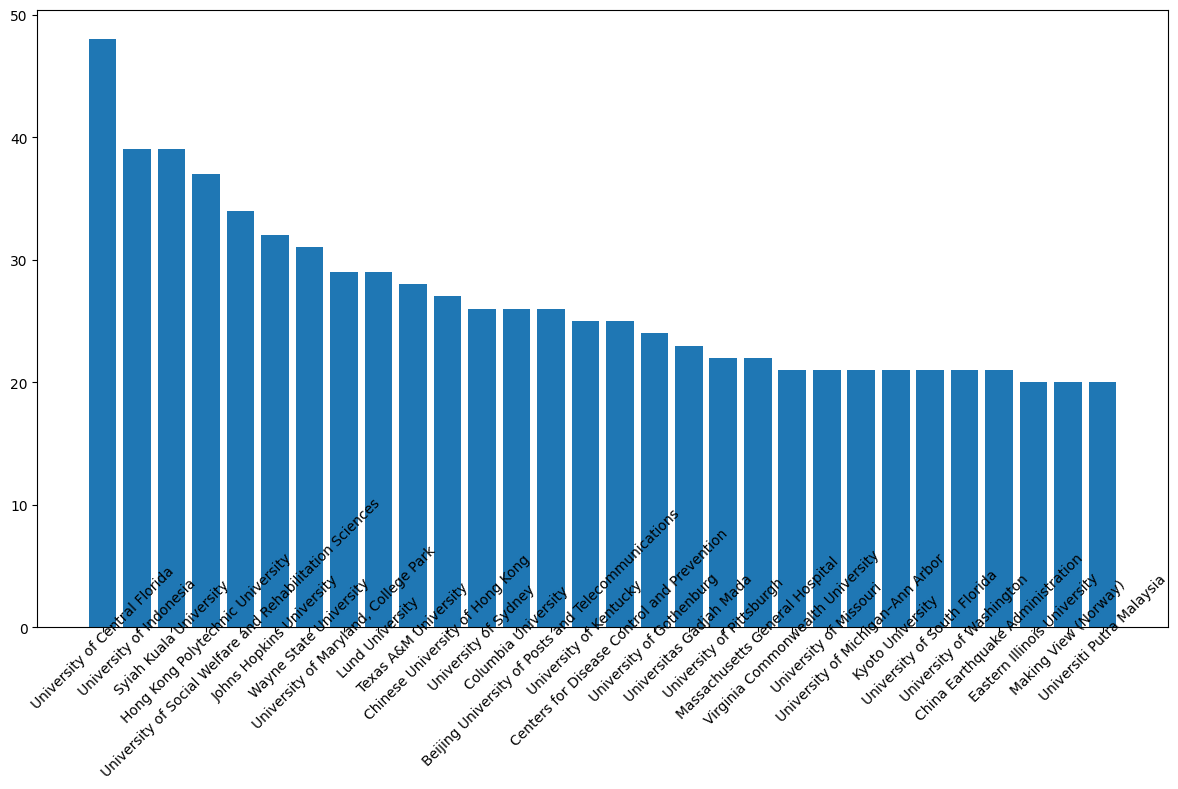

In [451]:
sorted_dict_items = sorted(institution_dict.items(), key=lambda item: item[1], reverse=True)[:30]
labels = [item[0] for item in sorted_dict_items]
values = [item[1] for item in sorted_dict_items]

plt.figure(figsize=(12,8))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="center", va="center")
plt.tight_layout()
plt.show()

In [452]:
data = pd.read_csv('../paper_docs.csv')
data

doi  \
0    https://doi.org/10.1111/j.1468-5973.2011.00639.x   
1               https://doi.org/10.1002/9781444314885   
2               https://doi.org/10.4135/9781071868096   
3                       https://doi.org/10.5772/55736   
4                https://doi.org/10.1353/ff.2013.0020   
..                                                ...   
531   https://doi.org/10.4018/978-1-7998-3473-1.ch151   
532           https://doi.org/10.7176/nmmc.vol9636-46   
533        https://doi.org/10.3311/floodrisk2020.19.1   
534              https://doi.org/10.2139/ssrn.3771377   
535             https://doi.org/10.1353/sor.2008.0016   

                                  ids  \
0    https://openalex.org/W1638501542   
1     https://openalex.org/W268257668   
2    https://openalex.org/W4312964573   
3    https://openalex.org/W1569469965   
4    https://openalex.org/W2076198500   
..                                ...   
531  https://openalex.org/W3122809911   
532  https://openalex.org/W3167411292   
533  https://openalex.org/W3181680212   
534  https://openalex.org/W3193154260   
535  https://openalex.org/W2102140168   

                                                 title publication_data  \
0    A Work‐In‐Process Literature Review: Incorpora...       04-04-2011   
1                 The Handbook of Crisis Communication       19-01-2010   
2             Choosing Crisis Communication Strategies       01-01-2021   
3    Disaster Risk Management and Social Impact Ass...       08-05-2013   
4    How to Survive Contagion, Disease, and Disaste...       01-01-2013   
..                                                 ...              ...   
531  Crisis Communication in the Age of Social Medi...       01-01-2021   
532  Social Media as Amedium of Crisis Communicatio...       01-01-2021   
533  Communication in crisis management – current s...       01-01-2021   
534  The Evaluation of the Role of Communication as...       01-01-2021   
535  Disaster Planning and Preparedness: A Human Story       01-09-2008   

    language                                            journal  \
0         en     Journal of Contingencies and Crisis Management   
1         en                                       Wiley eBooks   
2         en                                                NaN   
3         en                                      InTech eBooks   
4         en                                Feminist Formations   
..       ...                                                ...   
531       en  Advances in logistics, operations, and managem...   
532       en                   New media and mass communication   
533       en                                                NaN   
534       en                    Social Science Research Network   
535       en         Social Research An International Quarterly   

                                               authors  \
0    [{'author_position': 'first', 'author': {'id':...   
1    [{'author_position': 'first', 'author': {'id':...   
2    [{'author_position': 'first', 'author': {'id':...   
3    [{'author_position': 'first', 'author': {'id':...   
4    [{'author_position': 'first', 'author': {'id':...   
..                                                 ...   
531  [{'author_position': 'first', 'author': {'id':...   
532  [{'author_position': 'first', 'author': {'id':...   
533  [{'author_position': 'first', 'author': {'id':...   
534  [{'author_position': 'first', 'author': {'id':...   
535  [{'author_position': 'first', 'author': {'id':...   

                                              keywords  \
0    [{'keyword': 'crisis', 'score': 0.4202}, {'key...   
1    [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
2    [{'keyword': 'crisis', 'score': 0.5895}, {'key...   
3    [{'keyword': 'social impact assessment', 'scor...   
4    [{'keyword': 'emergency preparedness', 'score'...   
..                                                 ...   
531  [{'keyword': 'crisis', 'score': 0.5308}, {'key...   
532  

In [453]:
institution_dict = {}

for record in data['authors']:
    temp_set = set()
    record = ast.literal_eval(record)
    for author in record:
        try:
            temp_set.add(author['institutions'][0]['display_name'])
        except:
            continue
    for ins in list(temp_set):
        if ins in institution_dict:
            institution_dict[ins] += 1
        else:
            institution_dict[ins] = 1
            
institution_dict

{'Wayne State University': 5,
 'Dakota State University': 1,
 'University of Arkansas at Little Rock': 1,
 'Virginia Commonwealth University': 1,
 'University of Maryland, College Park': 5,
 'Fundação Oswaldo Cruz': 1,
 'Lund University': 3,
 'Maastricht University Medical Centre': 1,
 'Sinclair Community College': 1,
 "King's College London": 1,
 'University of Cambridge': 1,
 "Addenbrooke's Hospital": 1,
 'North Dakota State University': 1,
 'The Scarborough Hospital': 1,
 'University of Toronto': 1,
 'Indonesia University of Education': 3,
 'Ministry of Land, Infrastructure, Transport and Tourism': 1,
 'Korea University': 1,
 'Organisation For Economic Co-Operation and Development': 1,
 'Futuribles International': 1,
 'Technical University of Darmstadt': 1,
 'Philipps University of Marburg': 1,
 'University of Passau': 1,
 'Massachusetts Institute of Technology': 1,
 'Purdue University West Lafayette': 2,
 'University of Central Florida': 8,
 'Florida International University': 1,
 

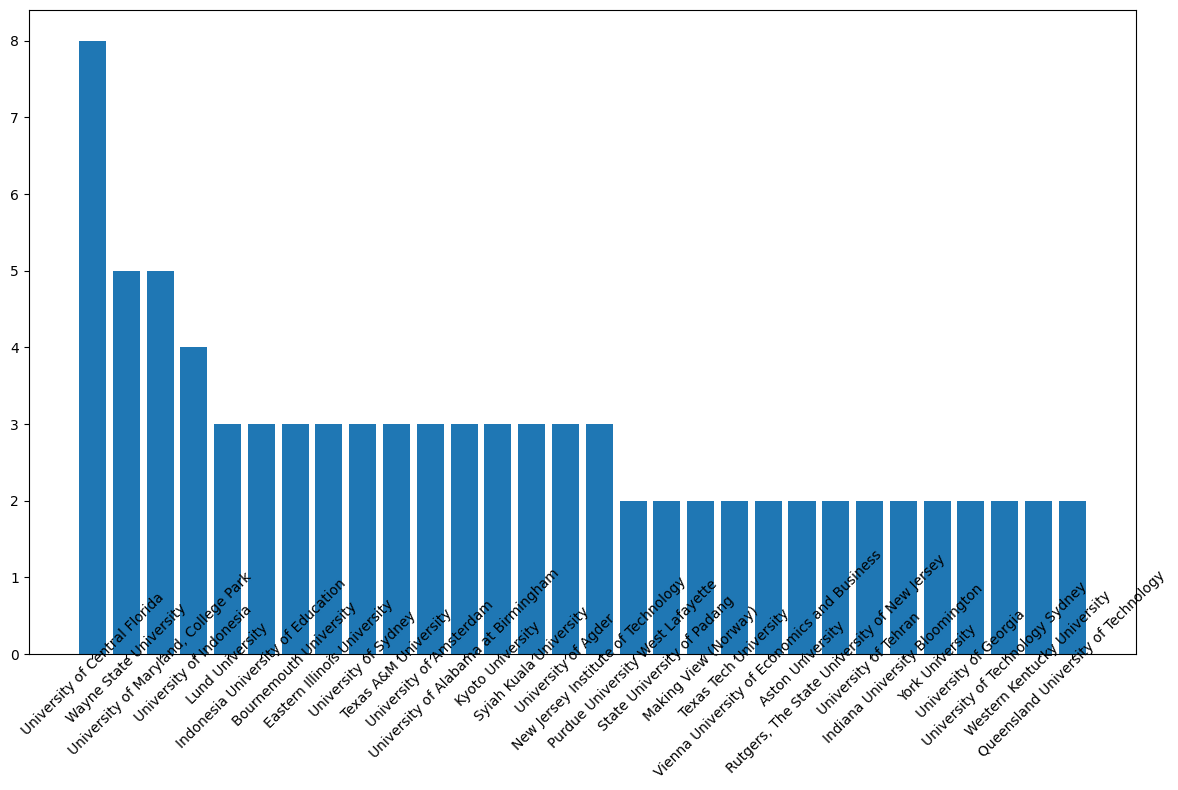

In [454]:
sorted_dict_items = sorted(institution_dict.items(), key=lambda item: item[1], reverse=True)[:30]
labels = [item[0] for item in sorted_dict_items]
values = [item[1] for item in sorted_dict_items]

plt.figure(figsize=(12,8))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="center", va="center")
plt.tight_layout()
plt.show()

In [66]:
import json
import networkx as nx

with open('concepts_co_occurence.json', 'r') as f:
    vosviewer_data = json.load(f)
    
G = nx.Graph()

for node in vosviewer_data['network']['items']:
    G.add_node(node['id'], label=node['label'], cluster=node['cluster'])

for link in vosviewer_data['network']['links']:
    G.add_edge(link['source_id'], link['target_id'], weight=link['strength'])

nx.write_gexf(G, 'concept_vosviewer_graph.gexf')

print("Conversion complete. The GEXF file has been saved as 'concept_vosviewer_graph.gexf'.")

Conversion complete. The GEXF file has been saved as 'concept_vosviewer_graph.gexf'.


In [97]:
import matplotlib.pyplot as plt_dd

with open('concepts_co_occurence.json', 'r') as f:
    vosviewer_data = json.load(f)
    
G = nx.Graph()

for node in vosviewer_data['network']['items']:
    G.add_node(node['id'], label=node['label'], cluster=node['cluster'])

for link in vosviewer_data['network']['links']:
    G.add_edge(link['source_id'], link['target_id'], weight=link['strength'])

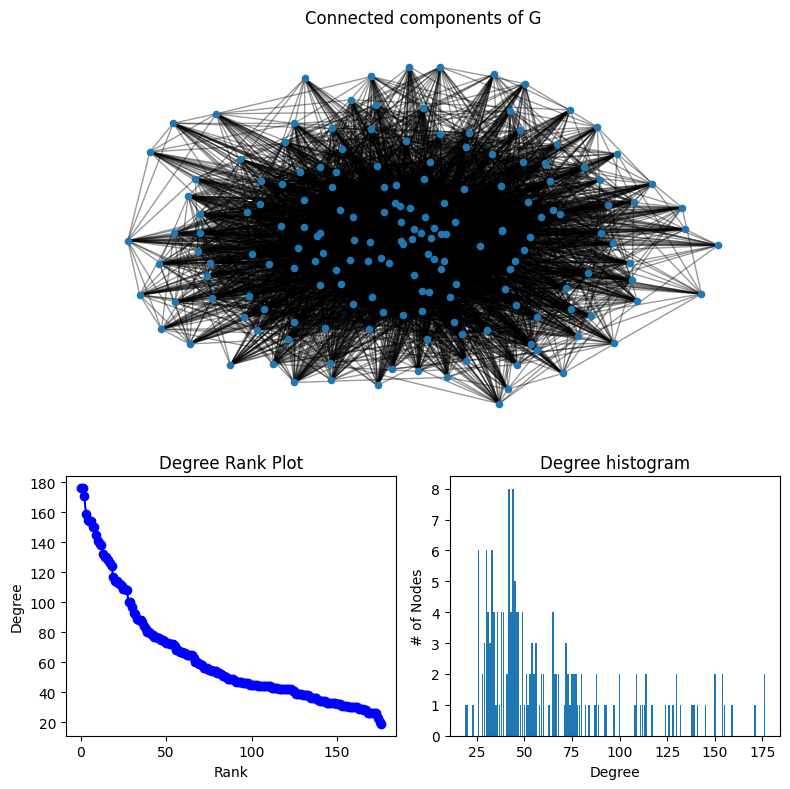

In [78]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt_dd.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt_dd.show()

In [96]:
G.nodes

NodeView((8, 10, 11, 13, 16, 28, 30, 34, 35, 38, 42, 48, 49, 56, 57, 68, 76, 78, 80, 85, 86, 87, 94, 95, 100, 102, 106, 108, 110, 111, 116, 117, 120, 122, 124, 131, 133, 135, 144, 147, 148, 149, 151, 152, 155, 161, 162, 164, 166, 171, 177, 182, 183, 184, 185, 186, 191, 195, 202, 203, 208, 215, 223, 224, 227, 233, 237, 239, 244, 248, 249, 259, 263, 264, 271, 280, 287, 289, 291, 295, 301, 304, 309, 312, 314, 315, 320, 325, 326, 328, 329, 331, 332, 333, 338, 340, 343, 349, 353, 356, 357, 368, 371, 372, 376, 378, 382, 383, 384, 386, 387, 389, 393, 399, 400, 402, 406, 407, 409, 415, 416, 419, 421, 425, 426, 427, 429, 431, 434, 437, 438, 441, 442, 445, 448, 449, 450, 453, 454, 455, 460, 463, 465, 473, 474, 477, 479, 480, 483, 485, 486, 507, 519, 526, 529, 531, 535, 536, 545, 546, 554, 562, 563, 564, 565, 569, 572, 575, 584, 594, 601, 606, 607, 614, 616, 617, 619))

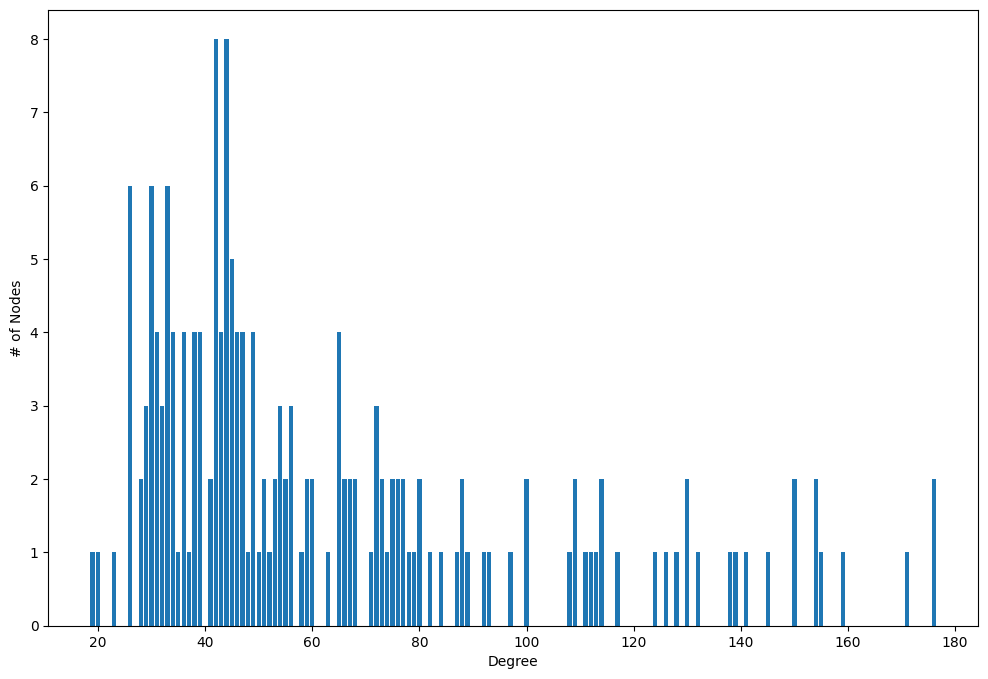

In [89]:
plt.figure(figsize=(12,8))
plt.bar(*np.unique(degree_sequence, return_counts=True))
#plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

plt.show()

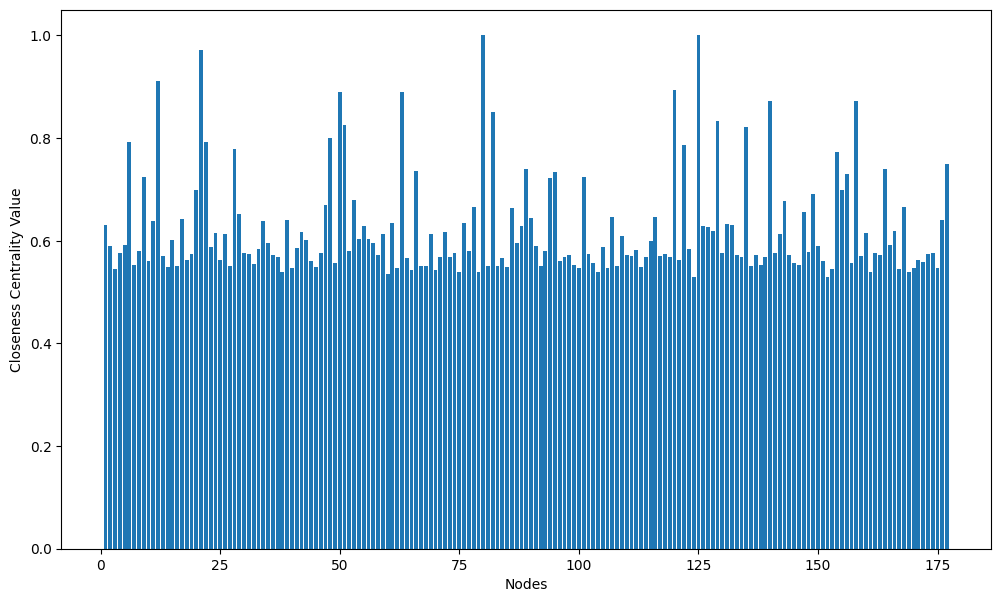

In [101]:
plt.figure(figsize=(12,7))
#nx.draw_networkx(G)
p = nx.closeness_centrality(G)      
plt.bar(range(1,178), p.values(), align='center')
plt.xlabel("Nodes")
plt.ylabel("Closeness Centrality Value")
plt.show()

In [79]:
import json
import networkx as nx

with open('organizational_collaboration.json', 'r') as f:
    vosviewer_data = json.load(f)

G = nx.Graph()

for node in vosviewer_data['network']['items']:
    G.add_node(node['id'], label=node['label'], cluster=node['cluster'])

for link in vosviewer_data['network']['links']:
    G.add_edge(link['source_id'], link['target_id'], weight=link['strength'])

nx.write_gexf(G, 'vosviewer_graph.gexf')

print("Conversion complete. The GEXF file has been saved as 'vosviewer_graph.gexf'.")

Conversion complete. The GEXF file has been saved as 'vosviewer_graph.gexf'.


In [57]:
import json

with open('organizational_collaboration.json', 'r') as f:
    vosviewer_data = json.load(f)

In [76]:
ins_cite_dict = {}

for node in vosviewer_data['network']['items']:
    ins_cite_dict[node['label']] = node['weights']['Citations'] 
    
sorted_ins_cite_dict = sorted(ins_cite_dict.items(), key=lambda item: item[1], reverse=True)[:15]
sorted_ins_cite_dict

[('university of central florida', 348.0),
 ('aston university', 144.0),
 ('dutch research council', 143.0),
 ('bangladesh university of engineering and technology', 109.0),
 ('futuribles international', 66.0),
 ('organisation for economic co-operation and development', 66.0),
 ('purdue university west lafayette', 66.0),
 ('florida international university', 62.0),
 ('lancaster university', 62.0),
 ('massachusetts institute of technology', 62.0),
 ('university of glasgow', 62.0),
 ('aalto university', 52.0),
 ('ohio university', 52.0),
 ('scripps college', 52.0),
 ('sultan qaboos university', 52.0)]

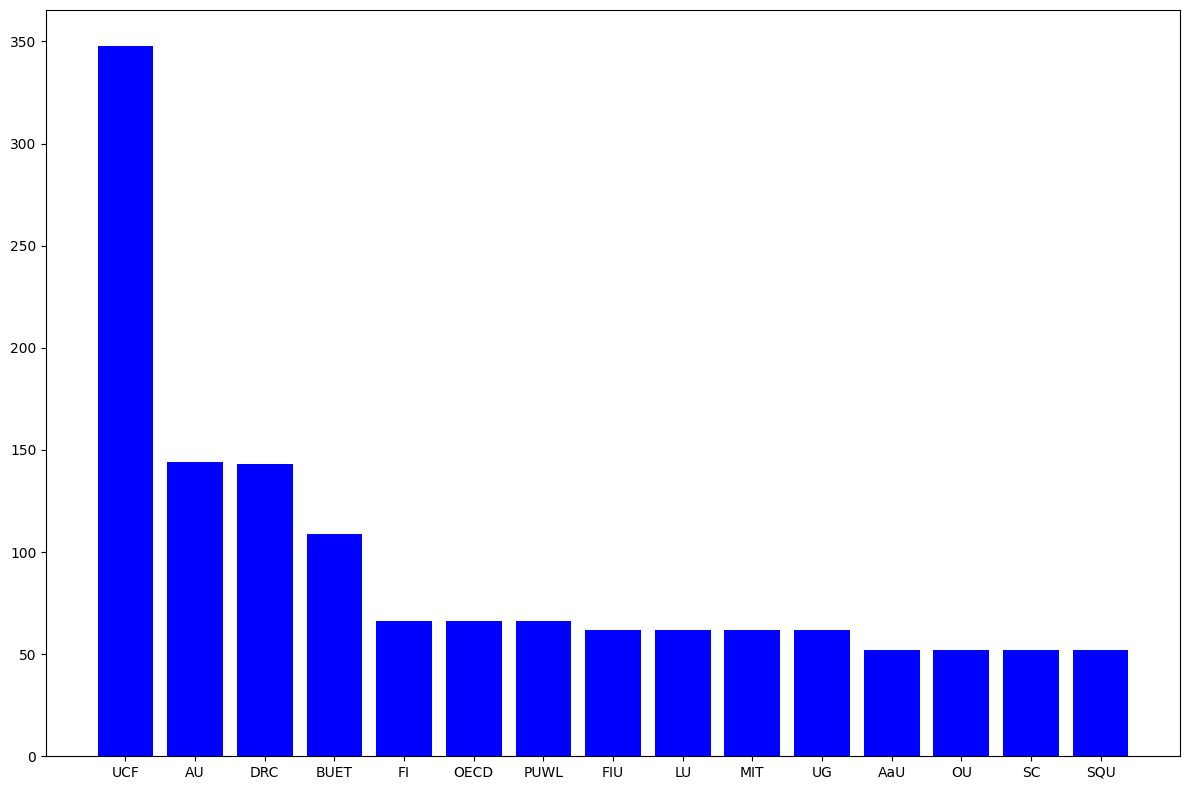

In [77]:
labels = ['UCF', 'AU', 'DRC', 'BUET', 'FI', 'OECD', 'PUWL', 'FIU', 'LU', 'MIT', 'UG', 'AaU', 'OU', 'SC', 'SQU']

#labels = [item[0] for item in sorted_ins_cite_dict]
values = [item[1] for item in sorted_ins_cite_dict]

plt.figure(figsize=(12,8))
plt.bar(labels, values, color='blue')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
encoder_lowercase = {k.lower(): v for k, v in encoder.items()}
encoder_lowercase

{'fundação oswaldo cruz': 1,
 "king's college london": 2,
 "addenbrooke's hospital": 3,
 'university of cambridge': 4,
 'indonesia university of education': 5,
 'ministry of land, infrastructure, transport and tourism': 6,
 'organisation for economic co-operation and development': 7,
 'futuribles international': 8,
 'philipps university of marburg': 9,
 'technical university of darmstadt': 10,
 'university of passau': 11,
 'massachusetts institute of technology': 12,
 'florida international university': 13,
 'university of central florida': 14,
 'purdue university west lafayette': 15,
 'the open university of japan': 16,
 'bournemouth university': 17,
 'istanbul metropolitan municipality': 18,
 'institute of occupational safety': 19,
 'lund university': 20,
 'universidad complutense de madrid': 21,
 'universidad san pablo ceu': 22,
 'university of maryland, college park': 23,
 'aston university': 24,
 'vienna university of economics and business': 25,
 'state university of malang': 26,

In [77]:
with open('organizational_collaboration.json', 'r') as f:
    vosviewer_data = json.load(f)
    
for node in vosviewer_data['network']['items']:
    try:
        print(encoded_institution_dict_category[encoder_lowercase[node['label']]])
    except:
        print('other')

response
preparedness
preparedness
recovery
preparedness
recovery
preparedness
preparedness
recovery
preparedness
other
preparedness
other
other
other
response
recovery
preparedness
preparedness
recovery
preparedness
other
response
preparedness
response
preparedness
preparedness
response
preparedness
response
other
preparedness
other
preparedness
response
other
response
recovery
preparedness
preparedness
preparedness
recovery
response
response
other
response
recovery
recovery
other
preparedness
preparedness
recovery
preparedness
other
recovery
recovery
other
preparedness
preparedness
preparedness
other
preparedness
preparedness
response
other
preparedness
preparedness
other
preparedness
preparedness
other
recovery
recovery
response
preparedness
recovery
response
response
response
preparedness
preparedness
preparedness
other
other
recovery
response
response
response
preparedness
preparedness
preparedness
preparedness
response
recovery
response
preparedness
preparedness
other
preparednes

In [80]:
import json
import networkx as nx

with open('organizational_collaboration.json', 'r') as f:
    vosviewer_data = json.load(f)

G = nx.Graph()

for node in vosviewer_data['network']['items']:
    try:
        G.add_node(node['id'], label=node['label'], cluster=encoded_institution_dict_category[encoder_lowercase[node['label']]])
    except:
        G.add_node(node['id'], label=node['label'], cluster='other')

for link in vosviewer_data['network']['links']:
    G.add_edge(link['source_id'], link['target_id'], weight=link['strength'])

nx.write_gexf(G, 'manual_vosviewer_graph.gexf')

print("Conversion complete. The GEXF file has been saved as 'manual_vosviewer_graph.gexf'.")

Conversion complete. The GEXF file has been saved as 'manual_vosviewer_graph.gexf'.


In [175]:
with open('journal_citation.json', 'r') as f:
    data = json.load(f)

journal_cite_dict = {}

for node in data['network']['items']:
    try:
        journal_cite_dict[node['label']] = node['weights']['Citations']
    except:
        if 'others' in journal_cite_dict:
            journal_cite_dict['others'] += node['weights']['Citations']
        else:
            journal_cite_dict['others'] = 1

In [177]:
sorted(journal_cite_dict.items(), key=lambda item: item[1], reverse=True)[:15]

[('wiley ebooks', 475.0),
 ('disaster prevention and management', 250.0),
 ('european journal of operational research', 146.0),
 ('public management review', 89.0),
 ('oecd working papers on public governance', 66.0),
 ('ieee wireless communications', 63.0),
 ('international journal of disaster risk reduction', 63.0),
 ('transportation research record', 62.0),
 ('computers in human behavior', 47.0),
 ('technical communication quarterly', 45.0),
 ('journal of contingencies and crisis management', 44.0),
 ('cartography and geographic information science', 39.0),
 ('public relations review', 37.0),
 ('ieee aerospace and electronic systems magazine', 34.0),
 ('applied ergonomics/applied ergonomics', 33.0)]

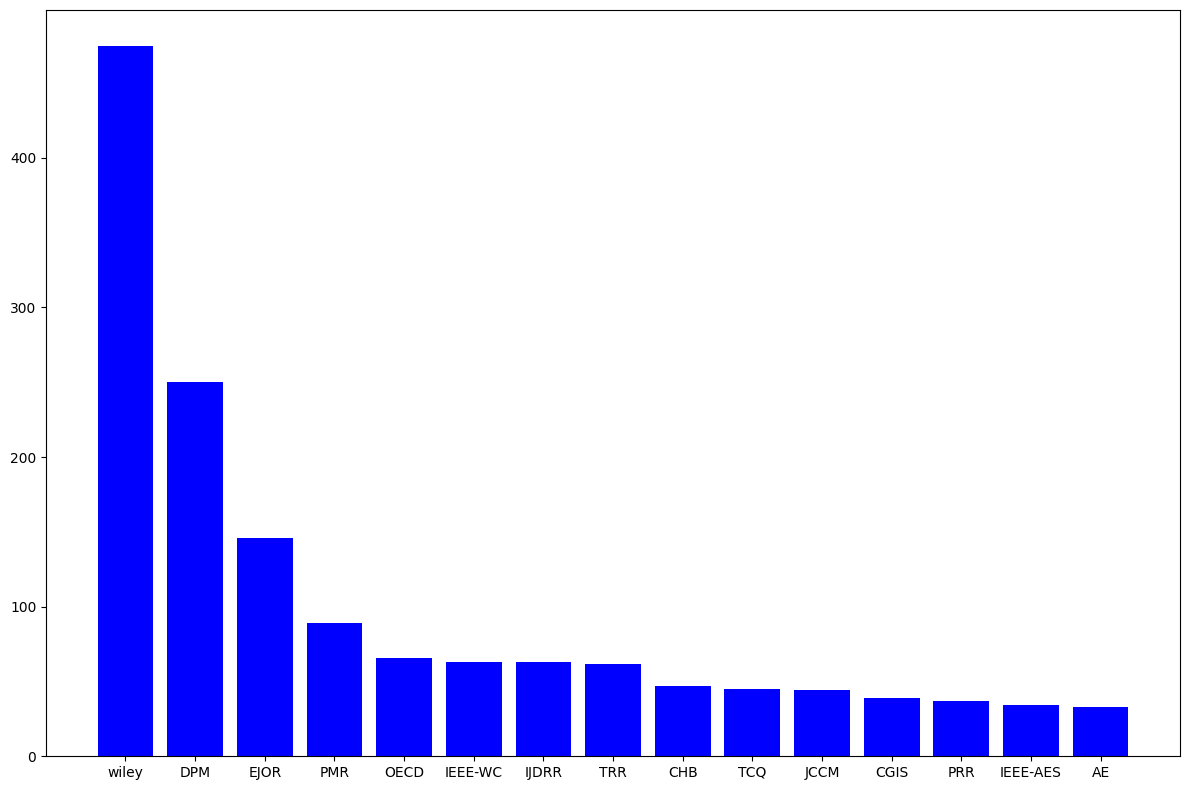

In [178]:
labels = ['wiley', 'DPM', 'EJOR', 'PMR', 'OECD', 'IEEE-WC', 'IJDRR', 'TRR', 'CHB', 'TCQ', 'JCCM', 'CGIS', 'PRR', 'IEEE-AES', 'AE']

#labels = [item[0] for item in sorted_ins_cite_dict]
values = [item[1] for item in sorted(journal_cite_dict.items(), key=lambda item: item[1], reverse=True)[:15]]

plt.figure(figsize=(12,8))
plt.bar(labels, values, color='blue')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [209]:
with open('article_citations.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    
article_cite_dict = {}

for node in data['network']['items']:
    article_cite_dict[node['description']] = node['weights']['Citations']

In [210]:
sorted_article_cite_dict = sorted(article_cite_dict.items(), key=lambda item: item[1], reverse=True)

In [211]:
from bs4 import BeautifulSoup

article_cite_dict = {}

html_tables = [item[0] for item in sorted_article_cite_dict]
citations = [item[1] for item in sorted_article_cite_dict]

for html_table, c in zip(html_tables, citations):
    soup = BeautifulSoup(html_table, 'lxml')
    title_row = None

    for row in soup.find_all('tr'):
        if row.find('td') and 'Title:' in row.find('td').text:
            title_row = row
            break

    if title_row is not None:
        title = title_row.find_all('td')[1].text
        article_cite_dict[title] = c
    else:
        print("Title row not found in the table:", html_table)

print(article_cite_dict)

{'the handbook of crisis communication': 423.0, 'disaster preparedness in humanitarian logistics: a collaborative approach for resource management in floods': 146.0, 'culture of preparedness: household disaster preparedness': 141.0, 'disaster preparedness for sustainable development in bangladesh': 109.0, 'information communication technology utilization for effective emergency management networks': 89.0, 'the use of social media in risk and crisis communication': 66.0, 'an overview of post-disaster emergency communication systems in the future networks': 63.0, 'crisis communication patterns in social media during hurricane sandy': 62.0, 'public health agencies outreach through instagram during the covid-19 pandemic: crisis and emergency risk communication perspective': 54.0, 'the handbook of international crisis communication research': 52.0, 'communication in the face of a school crisis: examining the volume and content of social media mentions during active shooter incidents': 47.0,

In [212]:
screened_refs_details['title_lower'] = screened_refs_details['title'].str.lower()

screened_refs_details['citation'] = screened_refs_details['title_lower'].map(article_cite_dict)

screened_refs_details.drop(columns=['title_lower'], inplace=True)

In [213]:
screened_refs_details

doi  \
0                https://doi.org/10.1002/9781444314885   
1           https://doi.org/10.1007/s43615-021-00060-x   
2                   https://doi.org/10.7176/nmmc/96-05   
3              https://doi.org/10.1093/bjs/znab134.185   
4       https://doi.org/10.1088/1755-1315/145/1/012103   
..                                                 ...   
188  https://doi.org/10.24940/theijhss/2020/v8/i4/h...   
189            https://doi.org/10.4236/jss.2020.810004   
190  https://doi.org/10.25392/leicester.data.133227...   
191       https://doi.org/10.1007/978-3-030-38040-3_87   
192    https://doi.org/10.4018/978-1-7998-3473-1.ch151   

                                  ids      category  \
0     https://openalex.org/W268257668         other   
1    https://openalex.org/W3173683644  preparedness   
2    https://openalex.org/W4249864866      response   
3    https://openalex.org/W3162876202  preparedness   
4    https://openalex.org/W2801985200      recovery   
..                                ...           ...   
188  https://openalex.org/W3195643002      recovery   
189  https://openalex.org/W3092063757  preparedness   
190  https://openalex.org/W3213488429  preparedness   
191  https://openalex.org/W3003192696         other   
192  https://openalex.org/W3122809911      recovery   

                                                 title publication_data  \
0                 The Handbook of Crisis Communication       2010-01-19   
1    COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
2    Social Media as Amedium of Crisis Communicatio...       2021-01-05   
3    986 A Systematic Review of Medical Student Wil...       2021-01-05   
4    The Preparedness Level of Community in Facing ...       2018-01-04   
..                                                 ...              ...   
188  Professional Perspectives on the Use of a Cris...       2020-10-13   
189  Meteorological Indigenous Knowledge Systems fo...       2020-01-01   
190  Crisis Communication in China: Strategies take...       2020-02-12   
191  Tweets Analysis for Disaster Management: Prepa...       2020-01-01   
192  Crisis Communication in the Age of Social Medi...       2021-01-01   

    language                                            journal  \
0         en                                       Wiley eBooks   
1         en                Circular Economy and Sustainability   
2         en                   New Media and Mass Communication   
3         en                         British Journal of Surgery   
4         en                              IOP conference series   
..       ...                                                ...   
188       en  International journal of humanities & social s...   
189       en                    Open Journal of Social Sciences   
190       en                                                NaN   
191       en  Lecture notes on data engineering and communic...   
192       en  Advances in logistics, operations, and managem...   

                                               authors  \
0    [{'author_position': 'first', 'author': {'id':...   
1    [{'author_position': 'first', 'author': {'id':...   
2                                                   []   
3    [{'author_position': 'first', 'author': {'id':...   
4    [{'author_position': 'first', 'author': {'id':...   
..                                                 ...   
188  [{'author_position': 'first', 'author': {'id':...   
189  [{'author_position': 'first', 'author': {'id':...   
190  [{'author_position': 'first', 'author': {'id':...   
191  [{'author_position': 'first', 'author': {'id':...   
192  [{'author_position': 'first', 'author': {'id':...   

                                              keywords  \
0    [{'keyword': 'crisis', 'score': 0.6262}, {'key...   
1    [{'keyword': 'pandemic preparedness', 'score':...   
2    [{'keyword': 'social media', 'score': 0.5196},...   
3    [{'keyword': 'medical student willingness', 's...   


In [218]:
screened_refs_details[screened_refs_details['category']=='preparedness'][['title','citation']].sort_values(by='citation', ascending=False)[:5]

title  citation
49  Disaster preparedness in humanitarian logistic...     146.0
46  Culture of preparedness: household disaster pr...     141.0
48  Disaster preparedness for sustainable developm...     109.0
70  Information Communication Technology Utilizati...      89.0
7   The Use of Social Media in Risk and Crisis Com...      66.0

In [220]:
screened_refs_details[screened_refs_details['category']=='response'][['title','citation']].sort_values(by='citation', ascending=False)[:5]

title  citation
10  Crisis Communication Patterns in Social Media ...      62.0
77  Public health agencies outreach through Instag...      54.0
63  Challenges of emergency communication network ...      40.0
87  SALICE project: Satellite-Assisted Localizatio...      34.0
18  Crisis Communication and Terrorist Attacks: Fr...      34.0

In [221]:
screened_refs_details[screened_refs_details['category']=='recovery'][['title','citation']].sort_values(by='citation', ascending=False)[:5]

title  citation
62  An Overview of Post-Disaster Emergency Communi...      63.0
67  Communication in the face of a school crisis: ...      47.0
51  Improving Communication in Crisis Management b...      43.0
79  Passing crisis and emergency risk communicatio...      33.0
73  Digital communication, the crisis of trust, an...      25.0

In [223]:
screened_refs_details.to_csv('screened_refs.csv',index=False)

## Categories and concepts vector

In [219]:
screened_refs_details[:16]

doi  \
0               https://doi.org/10.1002/9781444314885   
1          https://doi.org/10.1007/s43615-021-00060-x   
2                  https://doi.org/10.7176/nmmc/96-05   
3             https://doi.org/10.1093/bjs/znab134.185   
4      https://doi.org/10.1088/1755-1315/145/1/012103   
5         https://doi.org/10.1016/j.ijdrr.2020.102012   
6             https://doi.org/10.2196/preprints.31834   
7             https://doi.org/10.1787/5k3v01fskp9s-en   
8         https://doi.org/10.24135/pjr.v27i1and2.1203   
9          https://doi.org/10.26083/tuprints-00017838   
10           https://doi.org/10.1177/0361198118773896   
11  https://doi.org/10.1109/ieeeconf53624.2021.966...   
12         https://doi.org/10.5040/9781350090712.0012   
13            https://doi.org/10.22190/fuwlep2101061d   
14    https://doi.org/10.36348/sijlcj.2020.v03i12.006   
15              https://doi.org/10.1002/9781118516812   

                                 ids      category  \
0    https://openalex.org/W268257668         other   
1   https://openalex.org/W3173683644  preparedness   
2   https://openalex.org/W4249864866      response   
3   https://openalex.org/W3162876202  preparedness   
4   https://openalex.org/W2801985200      recovery   
5   https://openalex.org/W3111334162  preparedness   
6   https://openalex.org/W4206711179      recovery   
7   https://openalex.org/W2141600045  preparedness   
8   https://openalex.org/W3203546306      response   
9   https://openalex.org/W3110182477      response   
10  https://openalex.org/W2964012969      response   
11  https://openalex.org/W4205393323  preparedness   
12  https://openalex.org/W4200258959      recovery   
13  https://openalex.org/W3160568598  preparedness   
14  https://openalex.org/W3143201370      recovery   
15  https://openalex.org/W2490677660         other   

                                                title publication_data  \
0                The Handbook of Crisis Communication       2010-01-19   
1   COVID-19 and Future Disease X in Circular Econ...       2021-06-28   
2   Social Media as Amedium of Crisis Communicatio...       2021-01-05   
3   986 A Systematic Review of Medical Student Wil...       2021-01-05   
4   The Preparedness Level of Community in Facing ...       2018-01-04   
5   Role of pre-disaster discussions on preparedne...       2021-01-02   
6   The Spread of COVID-19 Crisis Communication by...       2021-06-07   
7   The Use of Social Media in Risk and Crisis Com...       2013-12-17   
8   Crisis communication and COVID-19: Covering tw...       2021-09-30   
9   RESCUE: A Resilient and Secure Device-to-Devic...       2020-09-11   
10  Crisis Communication Patterns in Social Media ...       2018-05-30   
11  A discussion of damage mitigation of natural d...       2021-11-15   
12                    Crisis communication on Twitter       2022-01-01   
13    THE IMPORTANCE OF COMMUNICATION IN AN EMERGENCY       2021-05-16   
14  Performance Assessment of Local Government Org...       2020-12-18   
15  The Handbook of International Crisis Communica...       2016-04-22   

   language                                            journal  \
0        en                                       Wiley eBooks   
1        en                Circular Economy and Sustainability   
2        en                   New Media and Mass Communication   
3        en                         British Journal of Surgery   
4        en                              IOP conference series   
5        en   International Journal of Disaster Risk Reduction   
6        en                                                NaN   
7        en           OECD working papers on public governance   
8        en                          Pacific Journalism Review   
9        en  IEEE Transactions on Dependable and Secure Com...   
10       en                     Transportation Research Record   
11       en  2021 Third International Sustainability and Re...   
12       en                         Bloomsbu

In [103]:
df = pd.DataFrame()
df['category'] = screened_refs_details['category']

In [110]:
nested_concept_list = []
for l in screened_refs_details['concepts']:
    temp_list = []
    l = ast.literal_eval(l)
    for d in l:
        temp_list.append(d['display_name'])
    nested_concept_list.append(temp_list)

In [115]:
df['concepts'] = nested_concept_list

In [116]:
df

category                                           concepts
0           other  [Crisis communication, Computer science, Polit...
1    preparedness  [Pandemic, Preparedness, Public health, Global...
2        response  [Social media, Popularity, Crisis communicatio...
3    preparedness  [Preparedness, Curriculum, Pandemic, Medicine,...
4        recovery  [Preparedness, Disaster preparedness, Landslid...
..            ...                                                ...
188      recovery  [Plan (archaeology), Crisis communication, Rep...
189  preparedness  [Preparedness, Indigenous, Geography, Governme...
190  preparedness  [Crisis communication, Crisis management, Gove...
191         other  [Emergency management, Social media, Computer ...
192      recovery  [Crisis communication, Social media, Reputatio...

[193 rows x 2 columns]

In [120]:
grouped = df.groupby('category')['concepts'].agg(lambda x: sum(x, []))
df = pd.DataFrame(grouped,columns=['concepts'])

In [128]:
dict_response = dict(Counter(list(df.loc['response'])[0]))
dict_recovery = dict(Counter(list(df.loc['recovery'])[0]))
dict_preparedness = dict(Counter(list(df.loc['preparedness'])[0]))

In [145]:
len_ = len(dict_response)
min_ = min(dict_response.values())
max_ = max(dict_response.values())
diff_ = max_-min_
scaled_dict_response = {}
#(v-min_)/diff_

for k,v in dict_response.items(): 
    scaled_dict_response[k] = round(v/len_,3)
    
sorted(scaled_dict_response.items(), key=lambda item: item[1], reverse=True)[:20]

[('Political science', 0.15),
 ('Law', 0.14),
 ('Computer science', 0.133),
 ('Public relations', 0.077),
 ('Business', 0.077),
 ('Emergency management', 0.07),
 ('Crisis communication', 0.067),
 ('Telecommunications', 0.053),
 ('Computer security', 0.05),
 ('Social media', 0.047),
 ('Philosophy', 0.043),
 ('Computer network', 0.043),
 ('Physics', 0.043),
 ('Sociology', 0.04),
 ('Engineering', 0.04),
 ('Geography', 0.033),
 ('Linguistics', 0.033),
 ('World Wide Web', 0.03),
 ('Psychology', 0.03),
 ('Quantum mechanics', 0.03)]

In [146]:
len_ = len(dict_recovery)
min_ = min(dict_recovery.values())
max_ = max(dict_recovery.values())
diff_ = max_-min_
scaled_dict_recovery = {}
#(v-min_)/diff_

for k,v in dict_recovery.items(): 
    scaled_dict_recovery[k] = round(v/len_,3)
    
sorted(scaled_dict_recovery.items(), key=lambda item: item[1], reverse=True)[:20]

[('Political science', 0.158),
 ('Law', 0.132),
 ('Public relations', 0.106),
 ('Computer science', 0.091),
 ('Sociology', 0.079),
 ('Crisis communication', 0.072),
 ('Social media', 0.064),
 ('Business', 0.064),
 ('Psychology', 0.057),
 ('Philosophy', 0.057),
 ('Preparedness', 0.053),
 ('Linguistics', 0.053),
 ('Emergency management', 0.049),
 ('Social science', 0.045),
 ('Geography', 0.042),
 ('Government (linguistics)', 0.042),
 ('World Wide Web', 0.038),
 ('Archaeology', 0.034),
 ('Computer security', 0.034),
 ('Engineering', 0.03)]

In [147]:
len_ = len(dict_preparedness)
min_ = min(dict_preparedness.values())
max_ = max(dict_preparedness.values())
diff_ = max_-min_
scaled_dict_preparedness = {}
#(v-min_)/diff_

for k,v in dict_preparedness.items(): 
    scaled_dict_preparedness[k] = round(v/len_,3)
    
sorted(scaled_dict_preparedness.items(), key=lambda item: item[1], reverse=True)[:20]

[('Political science', 0.201),
 ('Law', 0.183),
 ('Preparedness', 0.153),
 ('Emergency management', 0.138),
 ('Computer science', 0.129),
 ('Business', 0.126),
 ('Geography', 0.126),
 ('Public relations', 0.081),
 ('Engineering', 0.078),
 ('Archaeology', 0.072),
 ('Environmental planning', 0.057),
 ('Computer security', 0.057),
 ('Economics', 0.054),
 ('Meteorology', 0.051),
 ('Philosophy', 0.051),
 ('Disaster preparedness', 0.048),
 ('Sociology', 0.048),
 ('Natural disaster', 0.045),
 ('Crisis communication', 0.042),
 ('Linguistics', 0.042)]

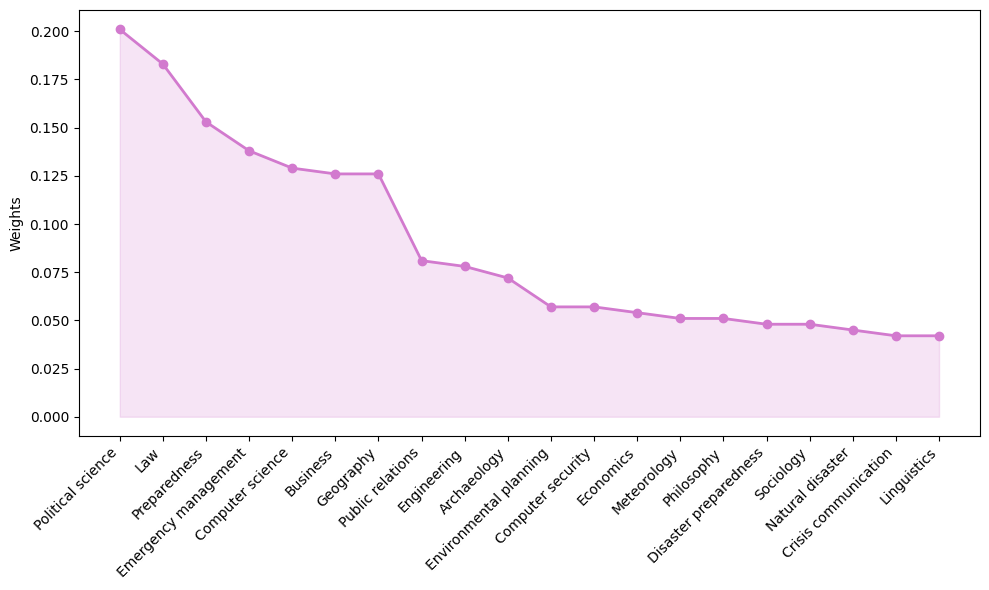

In [172]:
import matplotlib.pyplot as plt

labels = [x[0] for x in sorted(scaled_dict_preparedness.items(), key=lambda item: item[1], reverse=True)[:20]]
values = [x[1] for x in sorted(scaled_dict_preparedness.items(), key=lambda item: item[1], reverse=True)[:20]]

plt.figure(figsize=(10, 6))
plt.fill_between(labels, values, color='#d27ace', alpha=0.2)
plt.plot(labels, values, color='#d27ace', alpha=1, linewidth=2, marker='o')

#plt.xlabel('Concepts')
plt.ylabel('Weights')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

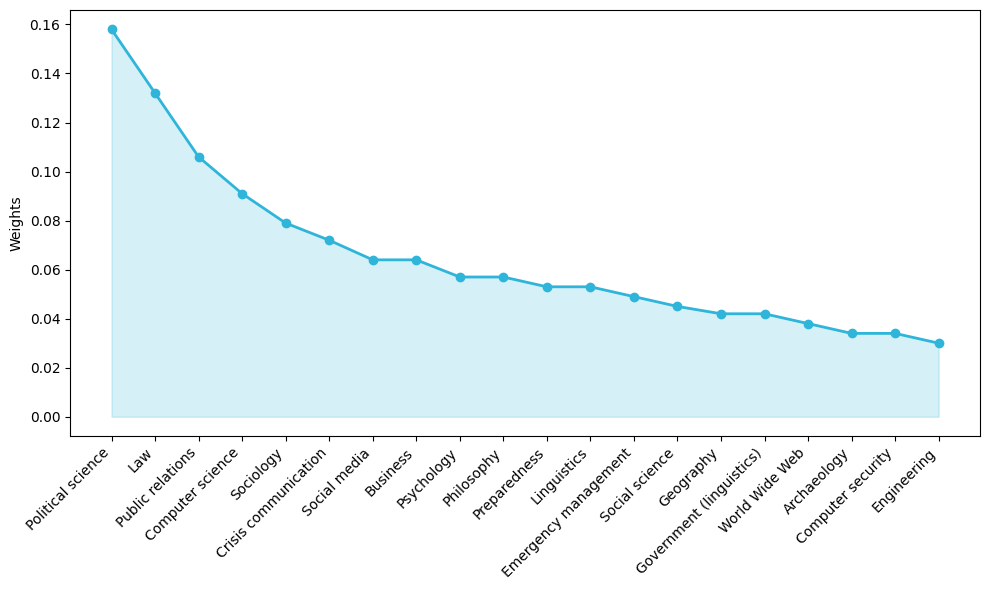

In [170]:
import matplotlib.pyplot as plt

labels = [x[0] for x in sorted(scaled_dict_recovery.items(), key=lambda item: item[1], reverse=True)[:20]]
values = [x[1] for x in sorted(scaled_dict_recovery.items(), key=lambda item: item[1], reverse=True)[:20]]

plt.figure(figsize=(10, 6))
plt.fill_between(labels, values, color='#2fb5da', alpha=0.2)
plt.plot(labels, values, color='#2fb5da', alpha=1, linewidth=2, marker='o')

#plt.xlabel('Concepts')
plt.ylabel('Weights')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

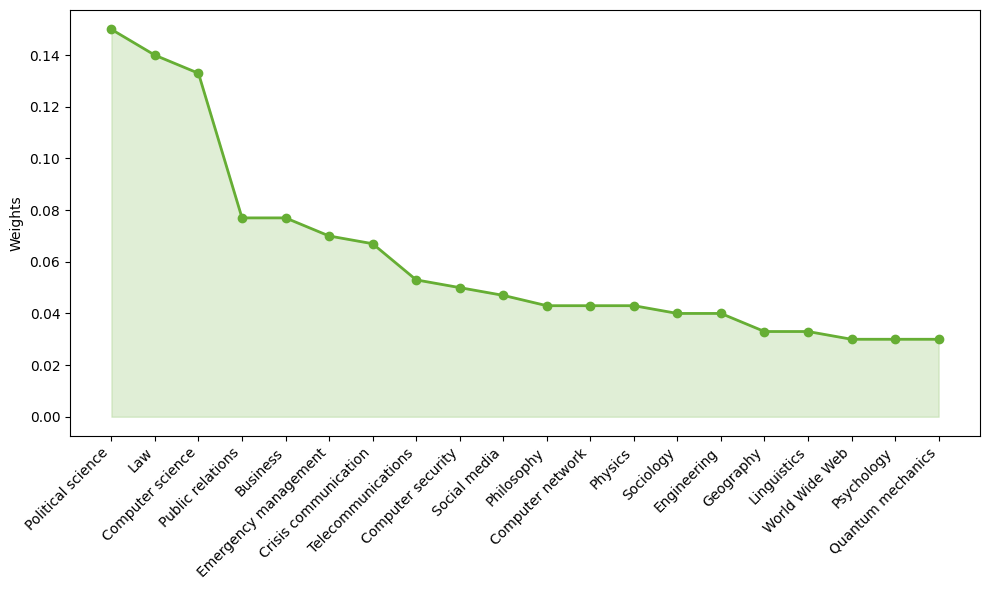

In [171]:
import matplotlib.pyplot as plt

labels = [x[0] for x in sorted(scaled_dict_response.items(), key=lambda item: item[1], reverse=True)[:20]]
values = [x[1] for x in sorted(scaled_dict_response.items(), key=lambda item: item[1], reverse=True)[:20]]

plt.figure(figsize=(10, 6))
plt.fill_between(labels, values, color='#66ae34', alpha=0.2)
plt.plot(labels, values, color='#66ae34', alpha=1, linewidth=2, marker='o')

#plt.xlabel('Concepts')
plt.ylabel('Weights')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()